# Домашнее задание 1

**Выполнил:** Сунцов Демид

**Задание:** Исследовать, как различные факторы влияют на красоту человека (красота измеряется по шкале от 1 до 5).

Выгрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [2]:
mpl.rcParams['figure.dpi'] = 300

Загрузим датасет из файла <code>beauty.csv</code>

In [3]:
df = pd.read_csv('beauty.csv')

Выгрузим первые несколько строк датасета

In [4]:
df.head()

,wage,exper,union,service,educ,looks,sex,race,status,health
0,5.73,30,no,no,14,4,female,white,married,good
1,4.28,28,no,no,12,3,female,white,married,good
2,7.96,35,no,no,10,4,female,white,single,good
3,11.57,38,no,no,16,3,male,white,married,good
4,11.42,27,no,no,16,3,male,white,married,good


Столбец **looks** $-$ это оценка внешности человека (целевая переменная).

Выведем размеры датасета

In [5]:
df.shape

(1260, 10)

Датасет состоит из 10 столбцов и 1260 значений. Теперь получим информацию о датасете 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     1260 non-null   float64
 1   exper    1260 non-null   int64  
 2   union    1260 non-null   object 
 3   service  1260 non-null   object 
 4   educ     1260 non-null   int64  
 5   looks    1260 non-null   int64  
 6   sex      1260 non-null   object 
 7   race     1260 non-null   object 
 8   status   1260 non-null   object 
 9   health   1260 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 98.6+ KB


В датасете отсутствуют пустые значения. 6 признаков являются категориальными, а остальные $-$ числовыми.

## Однофакторный анализ

Получим уникальные значения столбца **looks**

In [7]:
df['looks'].value_counts()

looks
3    722
4    364
2    142
5     19
1     13
Name: count, dtype: int64

Как видно, **looks** принимает всего лишь 5 различных значений. Для данной задачи предлагается рассматривать целевую переменную **looks** не как вещественнозначную, а как метку класса.

Добавим дополнительный столбец **looks_str**, который будет содержать строковые представления для оценки внешности человека.

In [8]:
df['looks_str'] = df['looks'].apply(lambda x : str(x))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wage       1260 non-null   float64
 1   exper      1260 non-null   int64  
 2   union      1260 non-null   object 
 3   service    1260 non-null   object 
 4   educ       1260 non-null   int64  
 5   looks      1260 non-null   int64  
 6   sex        1260 non-null   object 
 7   race       1260 non-null   object 
 8   status     1260 non-null   object 
 9   health     1260 non-null   object 
 10  looks_str  1260 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 108.4+ KB


## Однофакторный анализ

Проведем однофакторный анализ. Исследуем влияние каждого фактора в отдельности на красоту человека.

Начнем с признака **sex** (пол человека). Найдем количество уникальных значений для данного признака

In [10]:
df['sex'].value_counts()

sex
male      824
female    436
Name: count, dtype: int64

Из людей, по которым представлена информация в датасете, женщин приблизительно треть.

Построим гистограмму <code>seaborn.<font color=steelblue>histplot<font></code>, откладывая вдоль оси <code>y</code> величину **looks**, а в качестве параметра <code>hue</code> передавая **sex**.

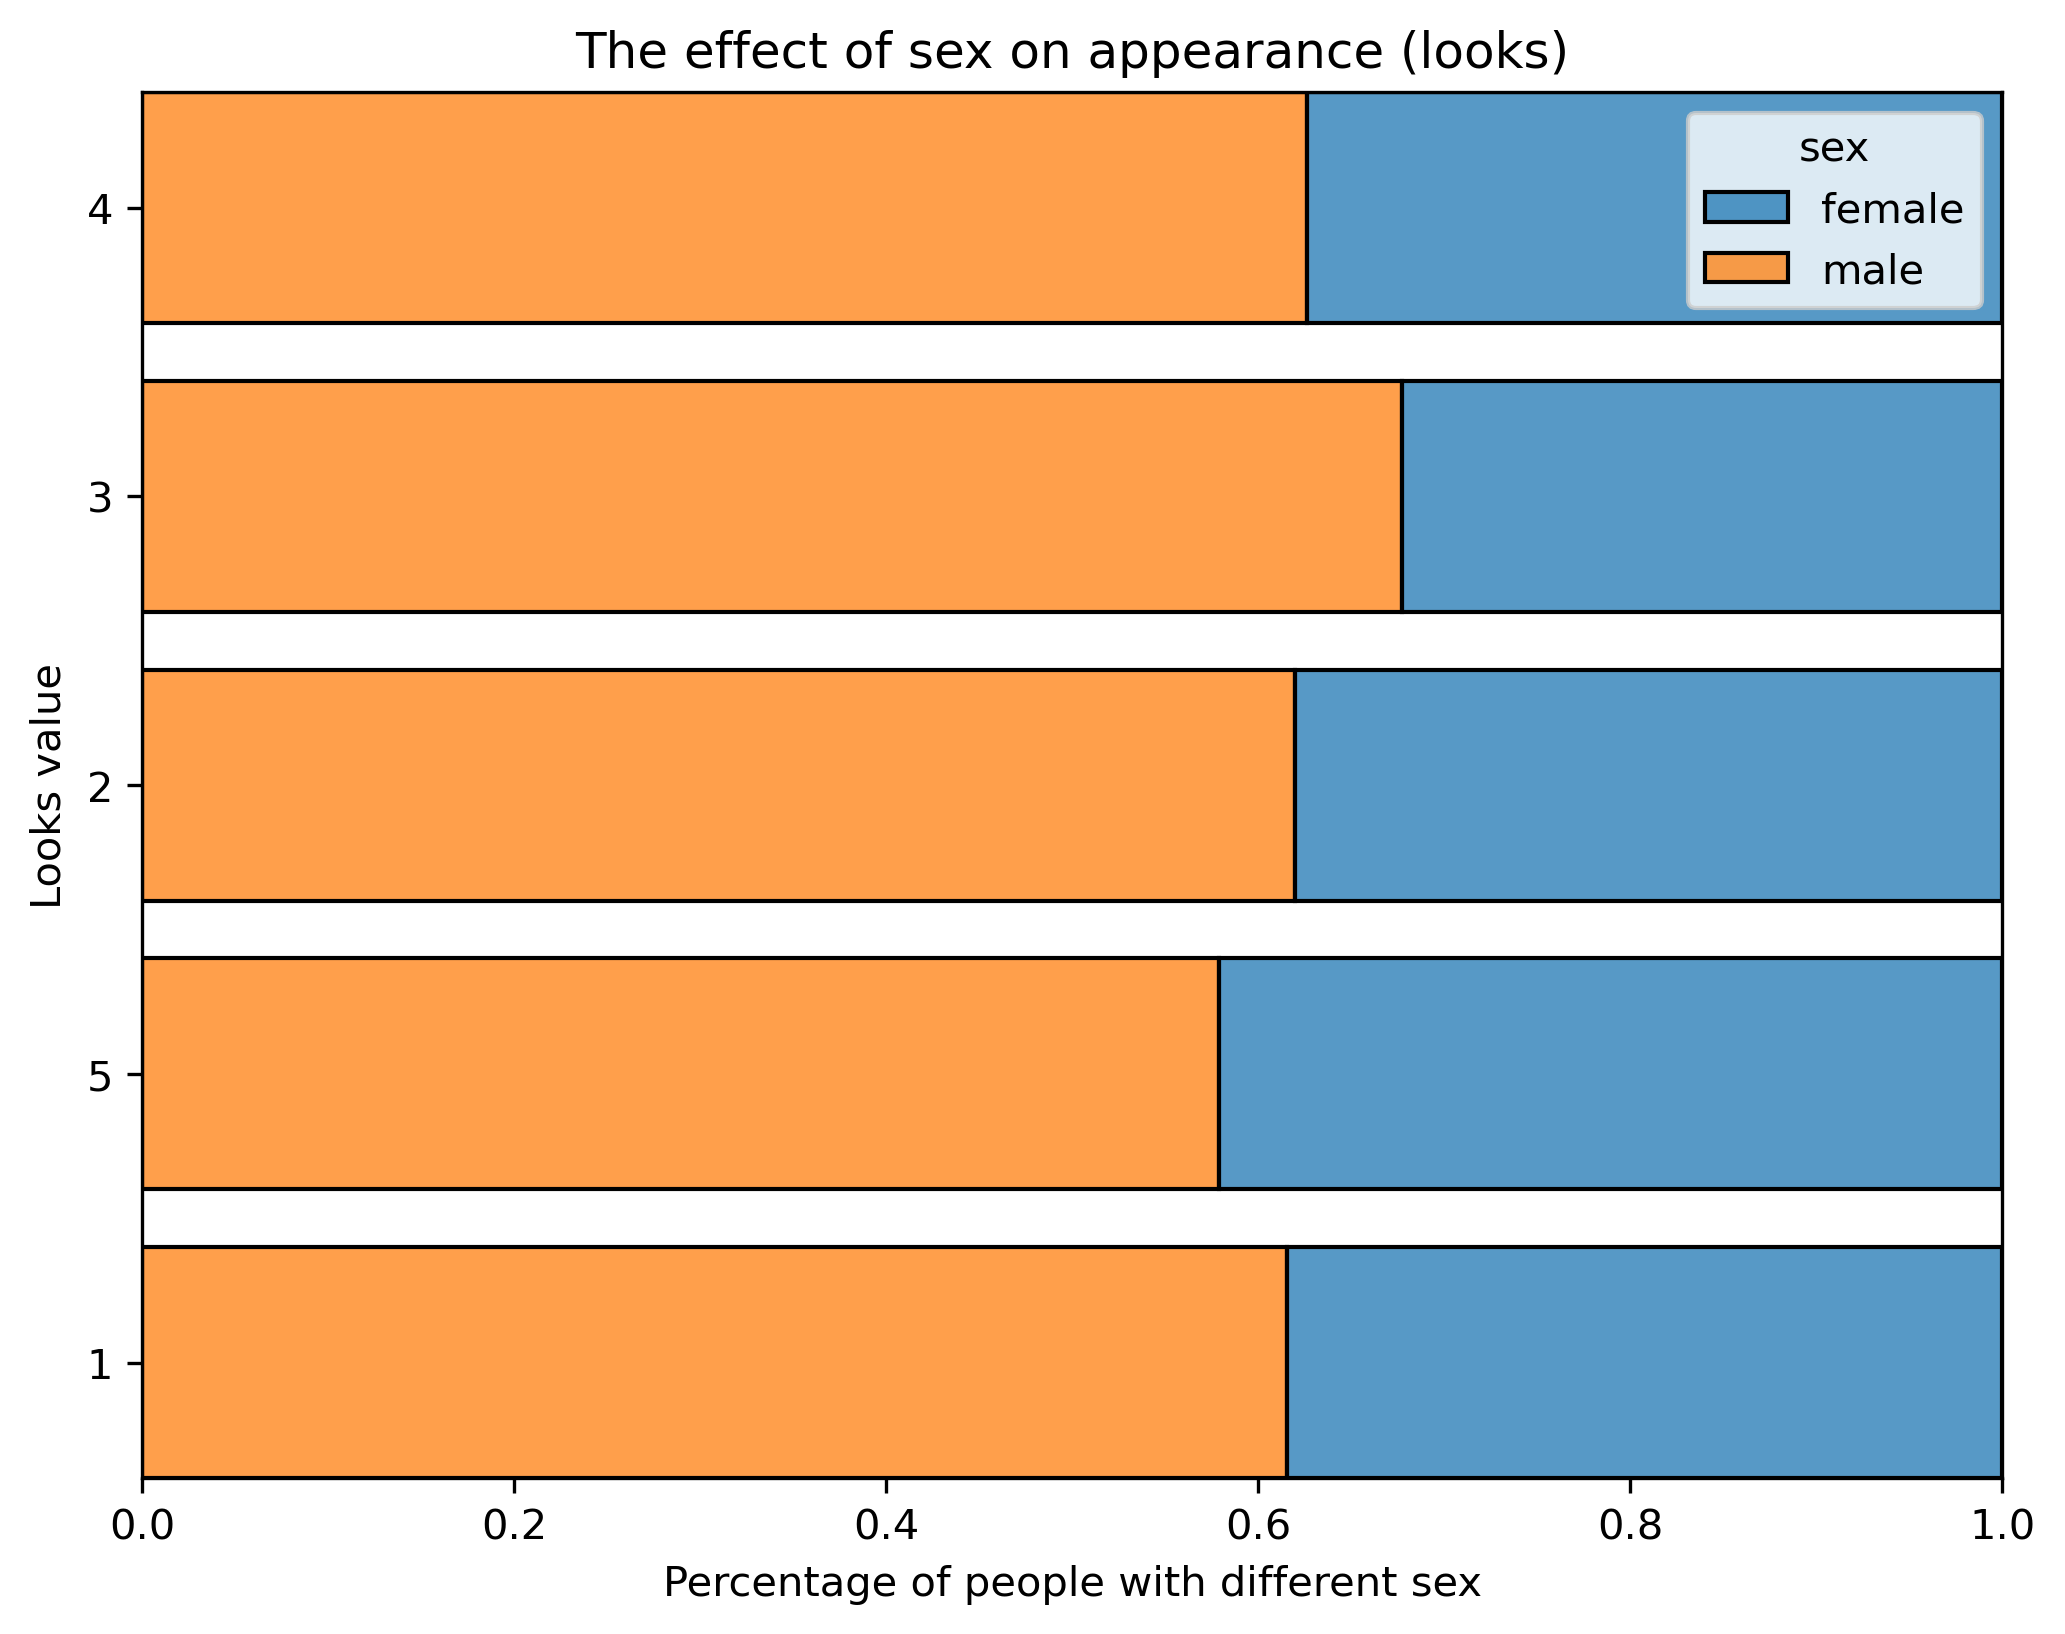

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The effect of sex on appearance (looks)')
ax.set_xlabel('Percentage of people with different sex')
ax.set_ylabel('Looks value')
sns.histplot(data=df, y='looks_str', hue='sex',
             multiple='fill', shrink=0.8)
plt.show()

Сравним среднюю оценку внешности для мужчин, женщин и для всех вместе. 

In [12]:
male_looks = df.loc[(df['sex'] == 'male')]
male_mean = male_looks['looks'].mean()

female_looks = df.loc[(df['sex'] == 'female')]
female_mean = female_looks['looks'].mean()

total_sex_mean = df['looks'].mean()

print(f'Male: {male_mean:.4f}')
print(f'Female: {female_mean:.4f}')
print(f'Total: {total_sex_mean:.4f}')

Male: 3.1772
Female: 3.2018
Total: 3.1857


Как видим, средние значения внешности почти одинаковы для трех групп. Поэтому можно выдвинуть гипотезу, что **sex** слабо влияет на **looks**.

Теперь перейдем к признаку **health**. Найдем количество людей с хорошим и плохим здоровьем.

In [13]:
df['health'].value_counts()

health
good    1176
bad       84
Name: count, dtype: int64

Признак **health** распределен неравномерно, что затрудняет анализ его влияния на величину **looks**. Слишком мало людей имеет плохое здоровье.

Снова построим гистограмму <code>sns.<font color=steelblue>histplot<font></code>.

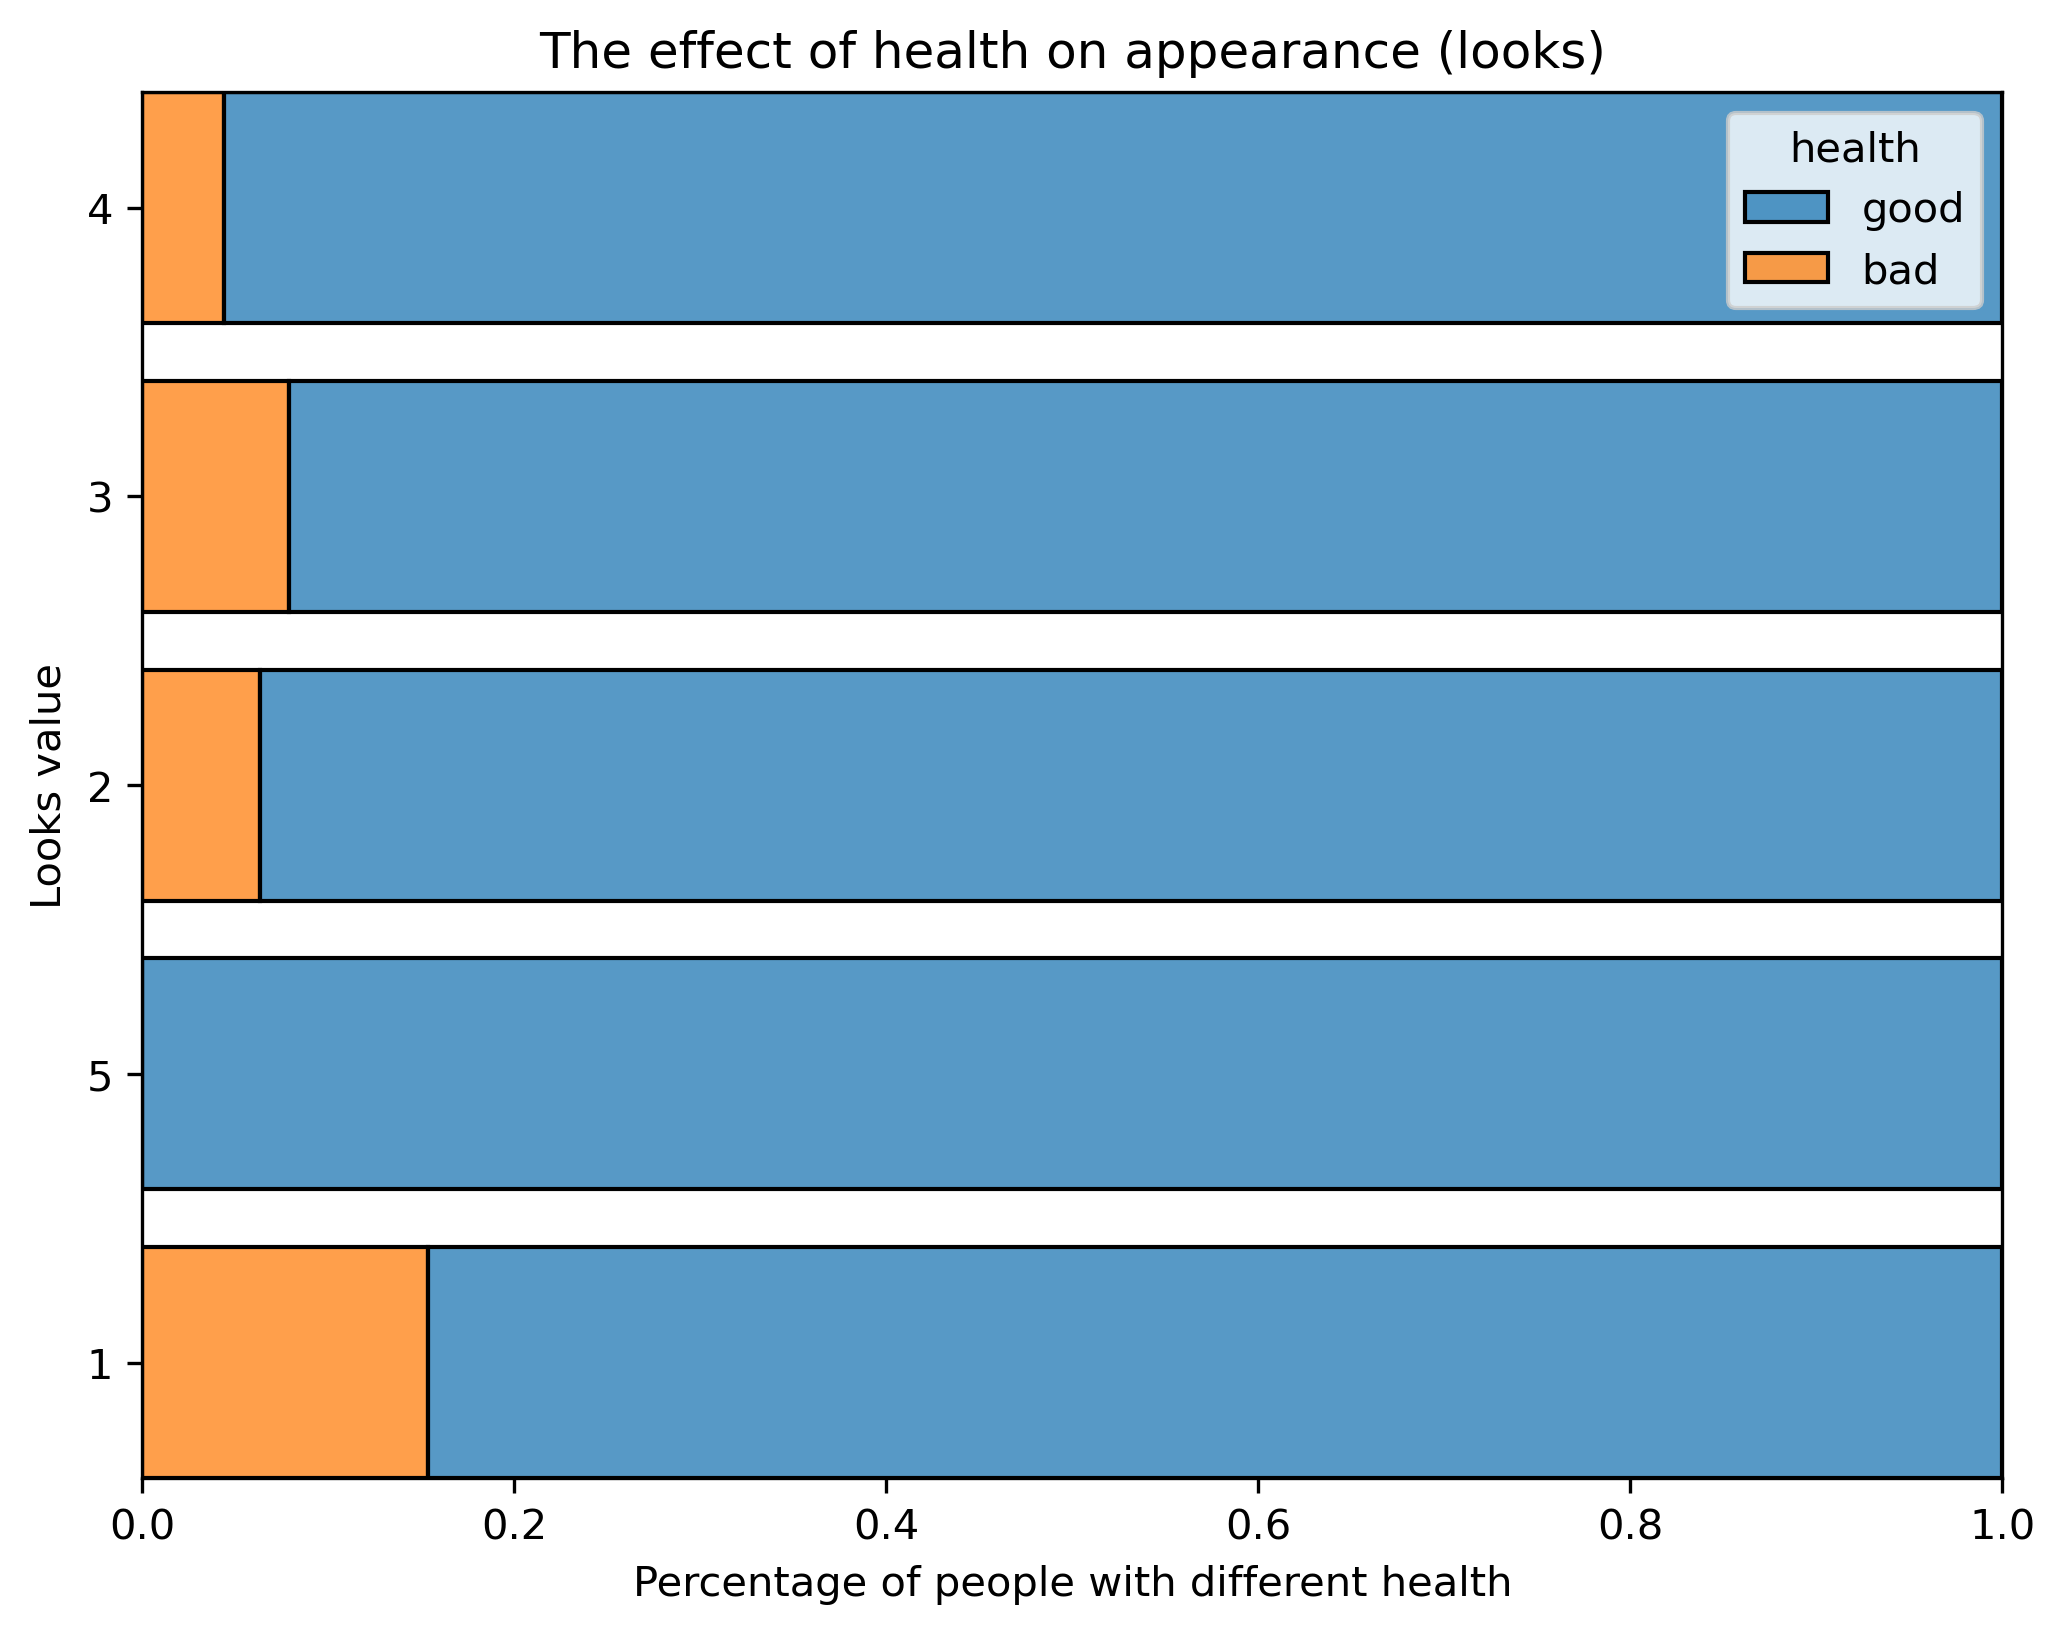

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The effect of health on appearance (looks)')
ax.set_xlabel('Percentage of people with different health')
ax.set_ylabel('Looks value')
sns.histplot(data=df, y='looks_str', hue='health',
             multiple='fill', shrink=0.8)
plt.show()

Как видим, имеется склонность давать высокую оценку внешности людям с хорошим здоровьем. Убедимся в этом, сравнив средние значения

In [15]:
good_looks = df.loc[(df['health'] == 'good')]
good_mean = good_looks['looks'].mean()

bad_looks = df.loc[(df['health'] == 'bad')]
bad_mean = bad_looks['looks'].mean()

total_health_mean = df['looks'].mean()

print(f'Good health: {good_mean:.4f}')
print(f'Bad health: {bad_mean:.4f}')
print(f'Total: {total_health_mean:.4f}')

Good health: 3.1964
Bad health: 3.0357
Total: 3.1857


Среднее для людей с хорошим здоровьем больше, чем для людей с плохим здоровьем. Поэтому можно принять предположение о положительном влиянии здоровья на внешность человека (несмотря на то, что людей с плохим здоровьем на порядок меньше, чем с хорошим).

Проанализируем влияние признака **status** (статус, женат/замужем или неженат/незамужем).

In [16]:
df['status'].value_counts()

status
married    871
single     389
Name: count, dtype: int64

Одиноких почти в два с половиной раза меньше, чем женатых/замужних.

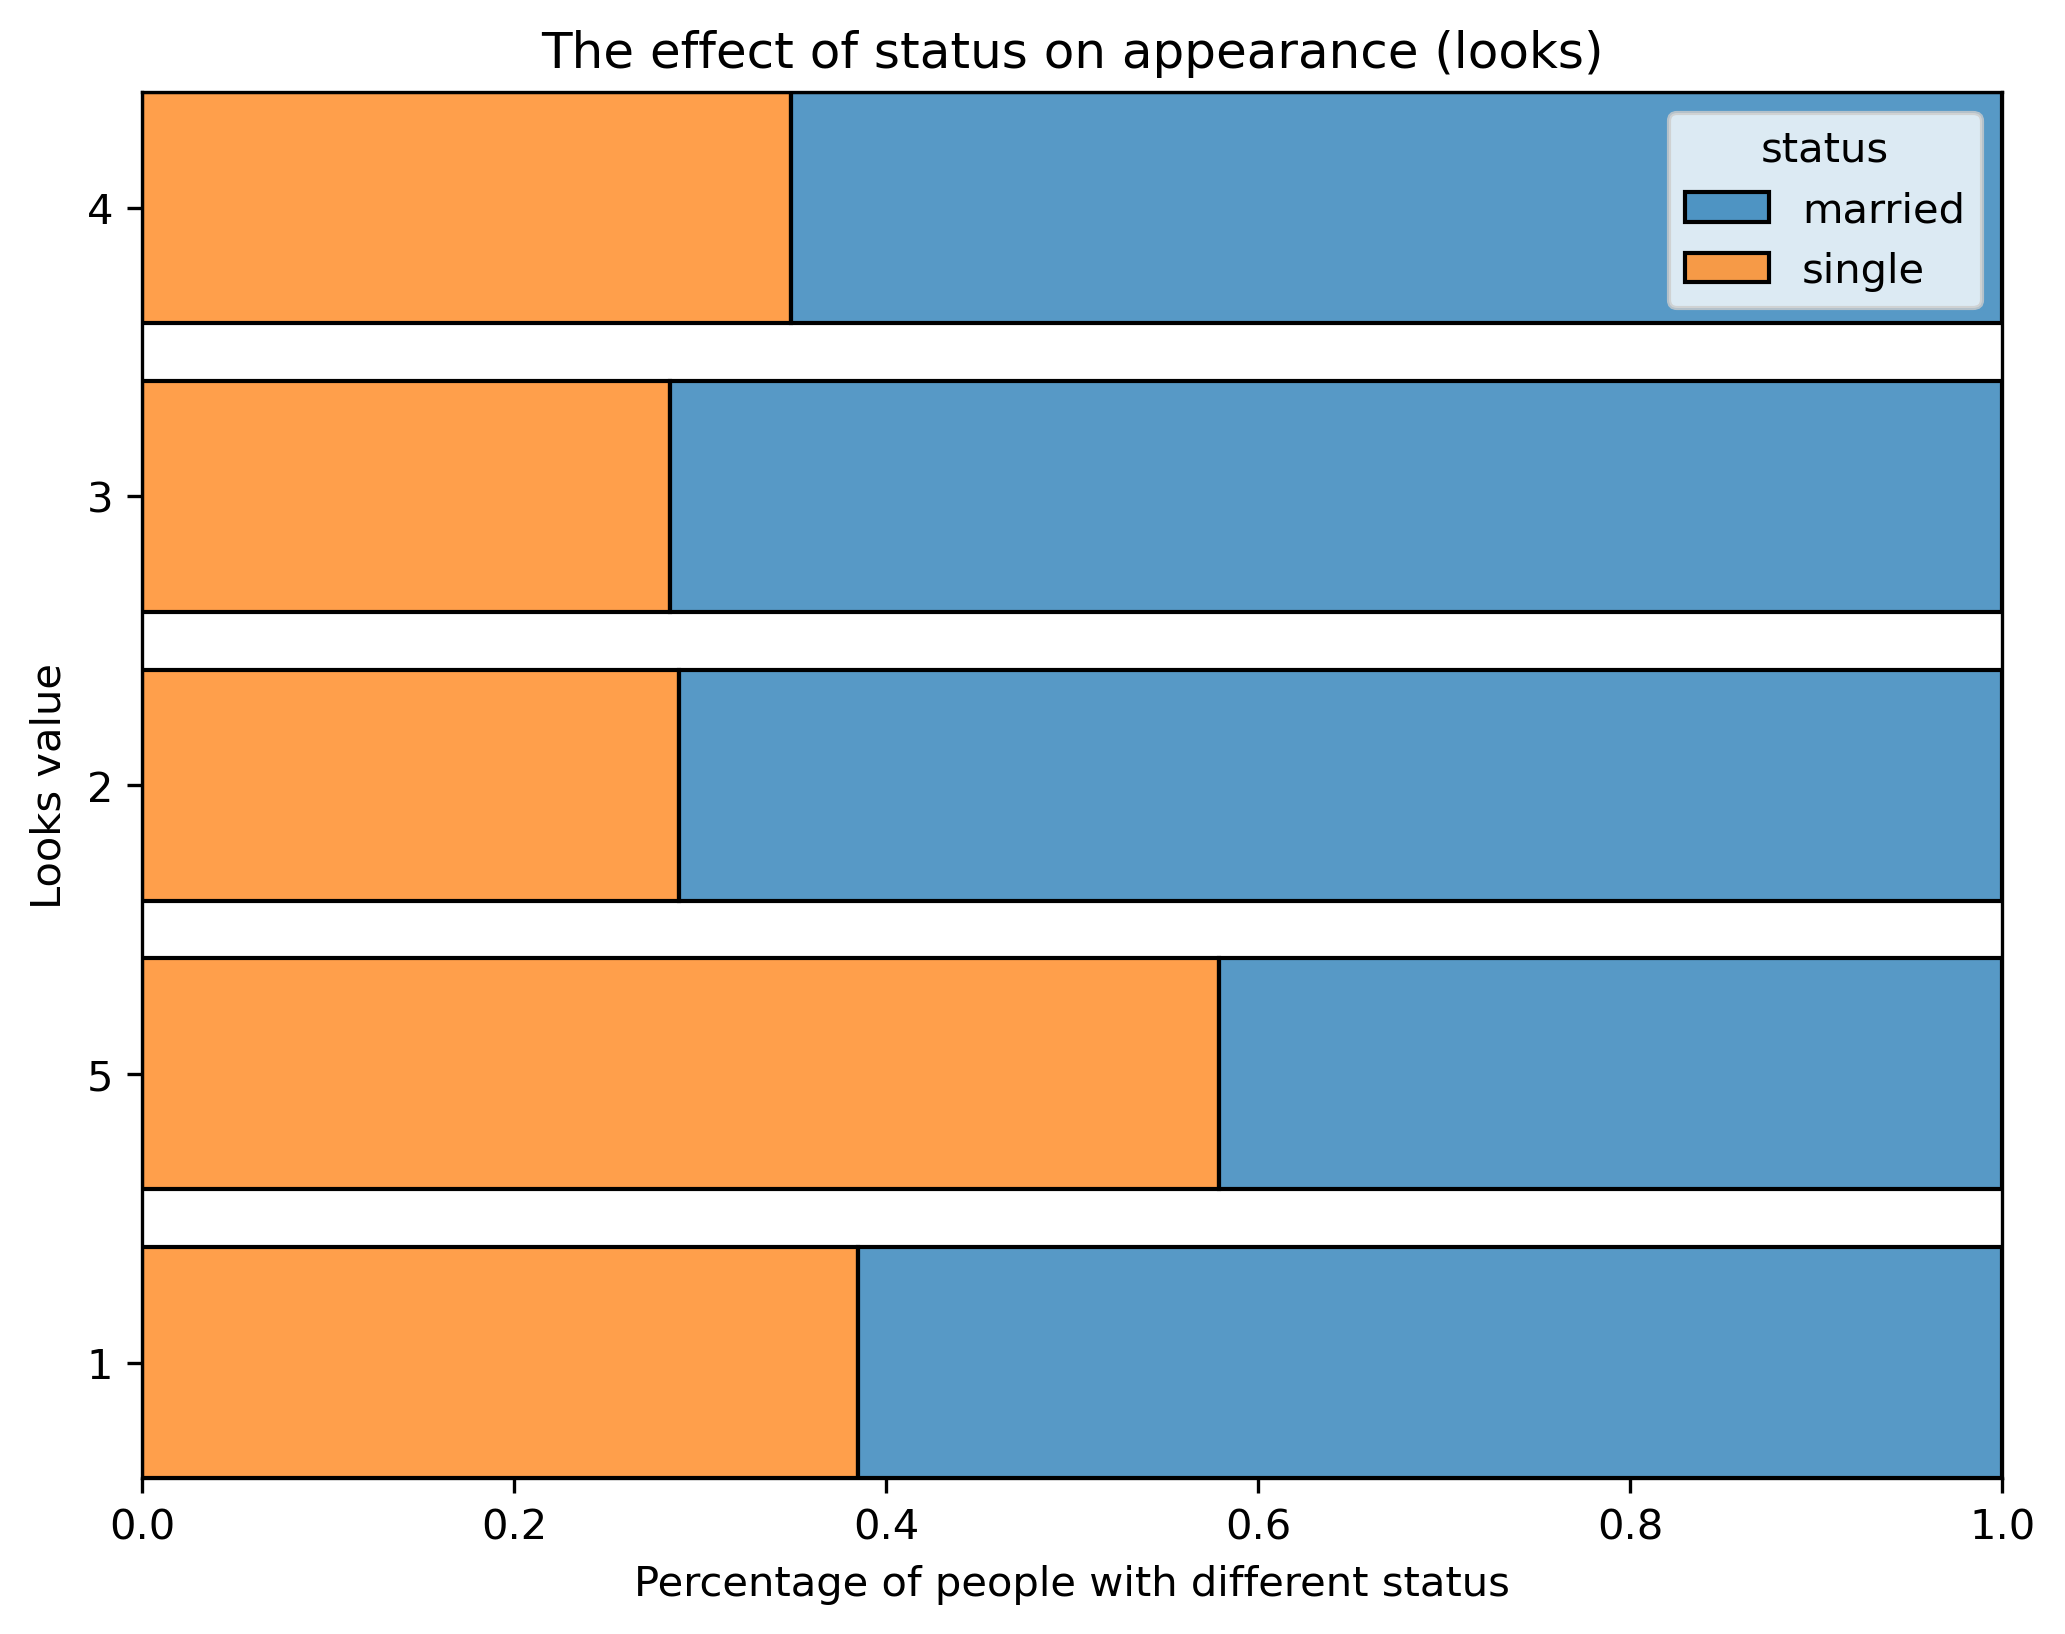

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The effect of status on appearance (looks)')
ax.set_xlabel('Percentage of people with different status')
ax.set_ylabel('Looks value')
sns.histplot(data=df, y='looks_str', hue='status',
             multiple='fill', shrink=0.8)
plt.show()

Влияние статуса на оценку внешнего вида пронаблюдать довольно трудно. Однако явно видно, что среди людей, чья внешность оценивается в 5 баллов, больше всего доля холостых и незамужних (около 60%).

In [18]:
single_looks = df.loc[(df['status'] == 'single')]
single_mean = single_looks['looks'].mean()

married_looks = df.loc[(df['status'] == 'married')]
married_mean = married_looks['looks'].mean()

total_status_mean = df['looks'].mean()

print(f'Single: {single_mean:.4f}')
print(f'Married: {married_mean:.4f}')
print(f'Total: {total_health_mean:.4f}')

Single: 3.2519
Married: 3.1561
Total: 3.1857


Одиноких склонны считать более красивыми, чем тех, кто замужем/женат. 

Перейдем к признакам **union** и **service**. Выведем их уникальные значения

In [19]:
df['union'].value_counts()

union
no    1260
Name: count, dtype: int64

In [20]:
df['service'].value_counts()

service
no    1260
Name: count, dtype: int64

Данные признаки можно смело убирать из рассмотрения, так как для них отсутствует вариативность.

Рассмотрим последний категориальный признак **race** (принадлежность к расе).

In [21]:
df['race'].value_counts()

race
white    1167
black      93
Name: count, dtype: int64

Снова наблюдается неравномерность по значению признака.

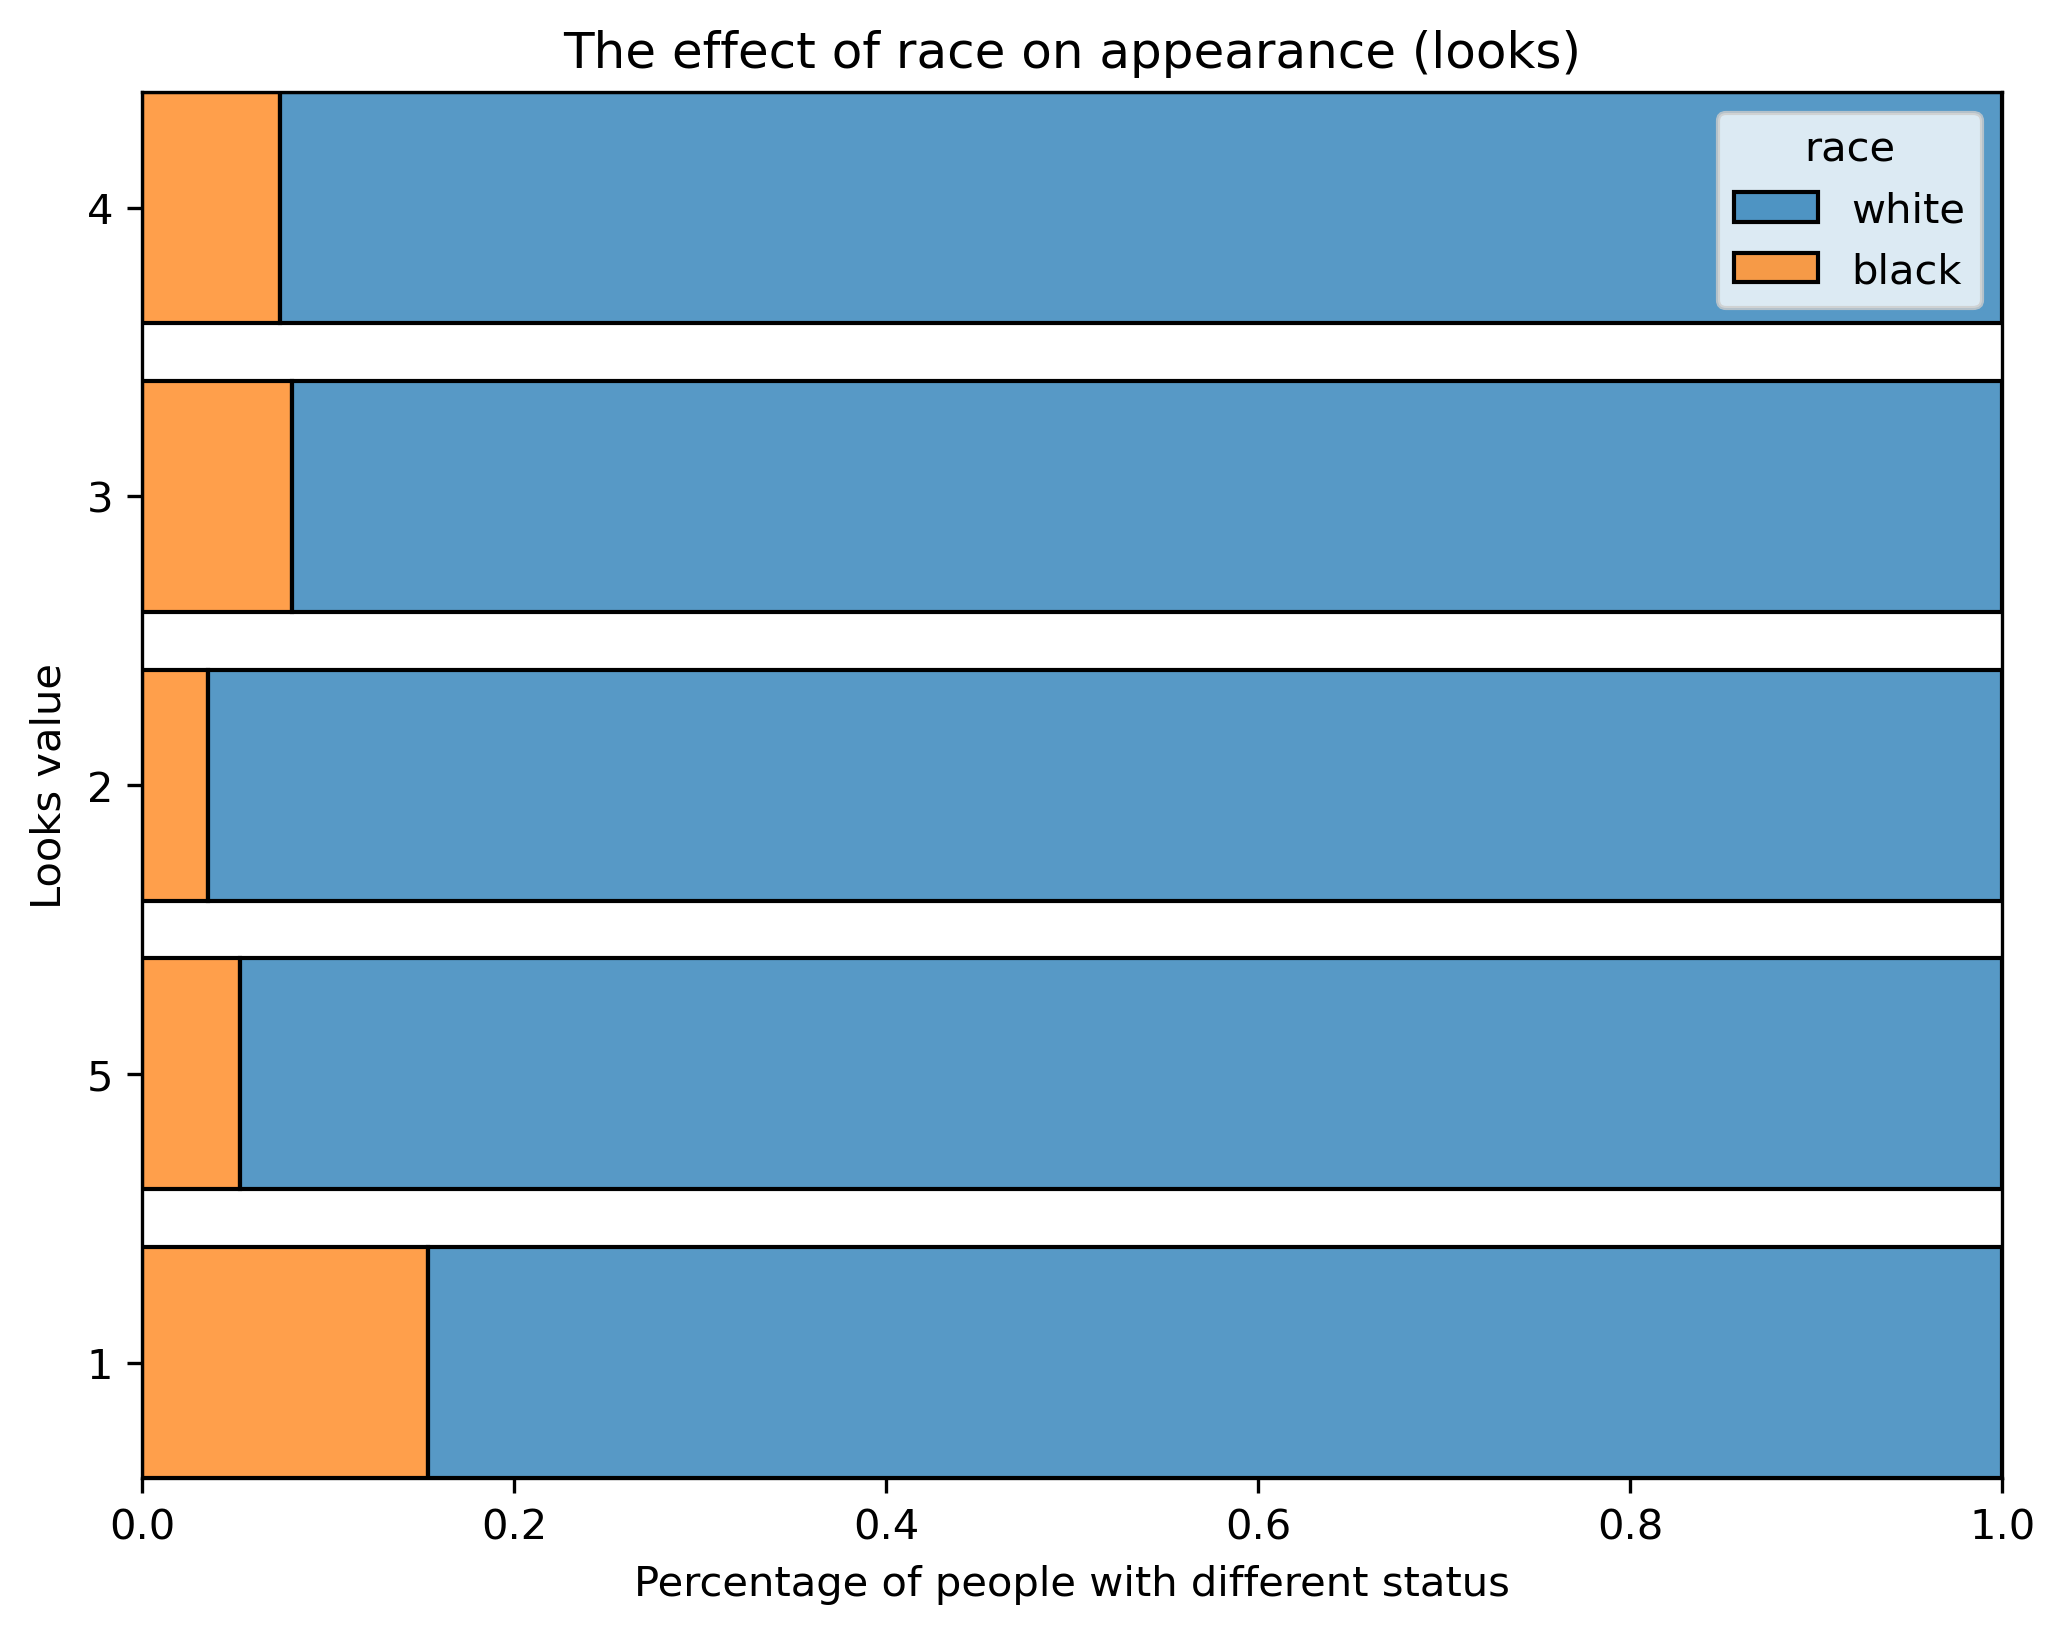

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The effect of race on appearance (looks)')
ax.set_xlabel('Percentage of people with different status')
ax.set_ylabel('Looks value')
sns.histplot(data=df, y='looks_str', hue='race',
             multiple='fill', shrink=0.8)
plt.show()

In [23]:
white_looks = df.loc[(df['race'] == 'white')]
white_mean = white_looks['looks'].mean()

black_looks = df.loc[(df['race'] == 'black')]
black_mean = black_looks['looks'].mean()

total_race_mean = df['looks'].mean()

print(f'White: {white_mean:.4f}')
print(f'Black: {black_mean:.4f}')
print(f'Total: {total_race_mean:.4f}')

White: 3.1834
Black: 3.2151
Total: 3.1857


Можем выдвинуть предположение, что раса слабо влияет на оценку внешности.

Теперь перейдем к числовым признакам. Начнем со столбца **exper** (experience, опыт работы). Изучим его более подробно, построив распределение в виде гистограммы <code>plt.<font color=steelblue>hist</font></code>

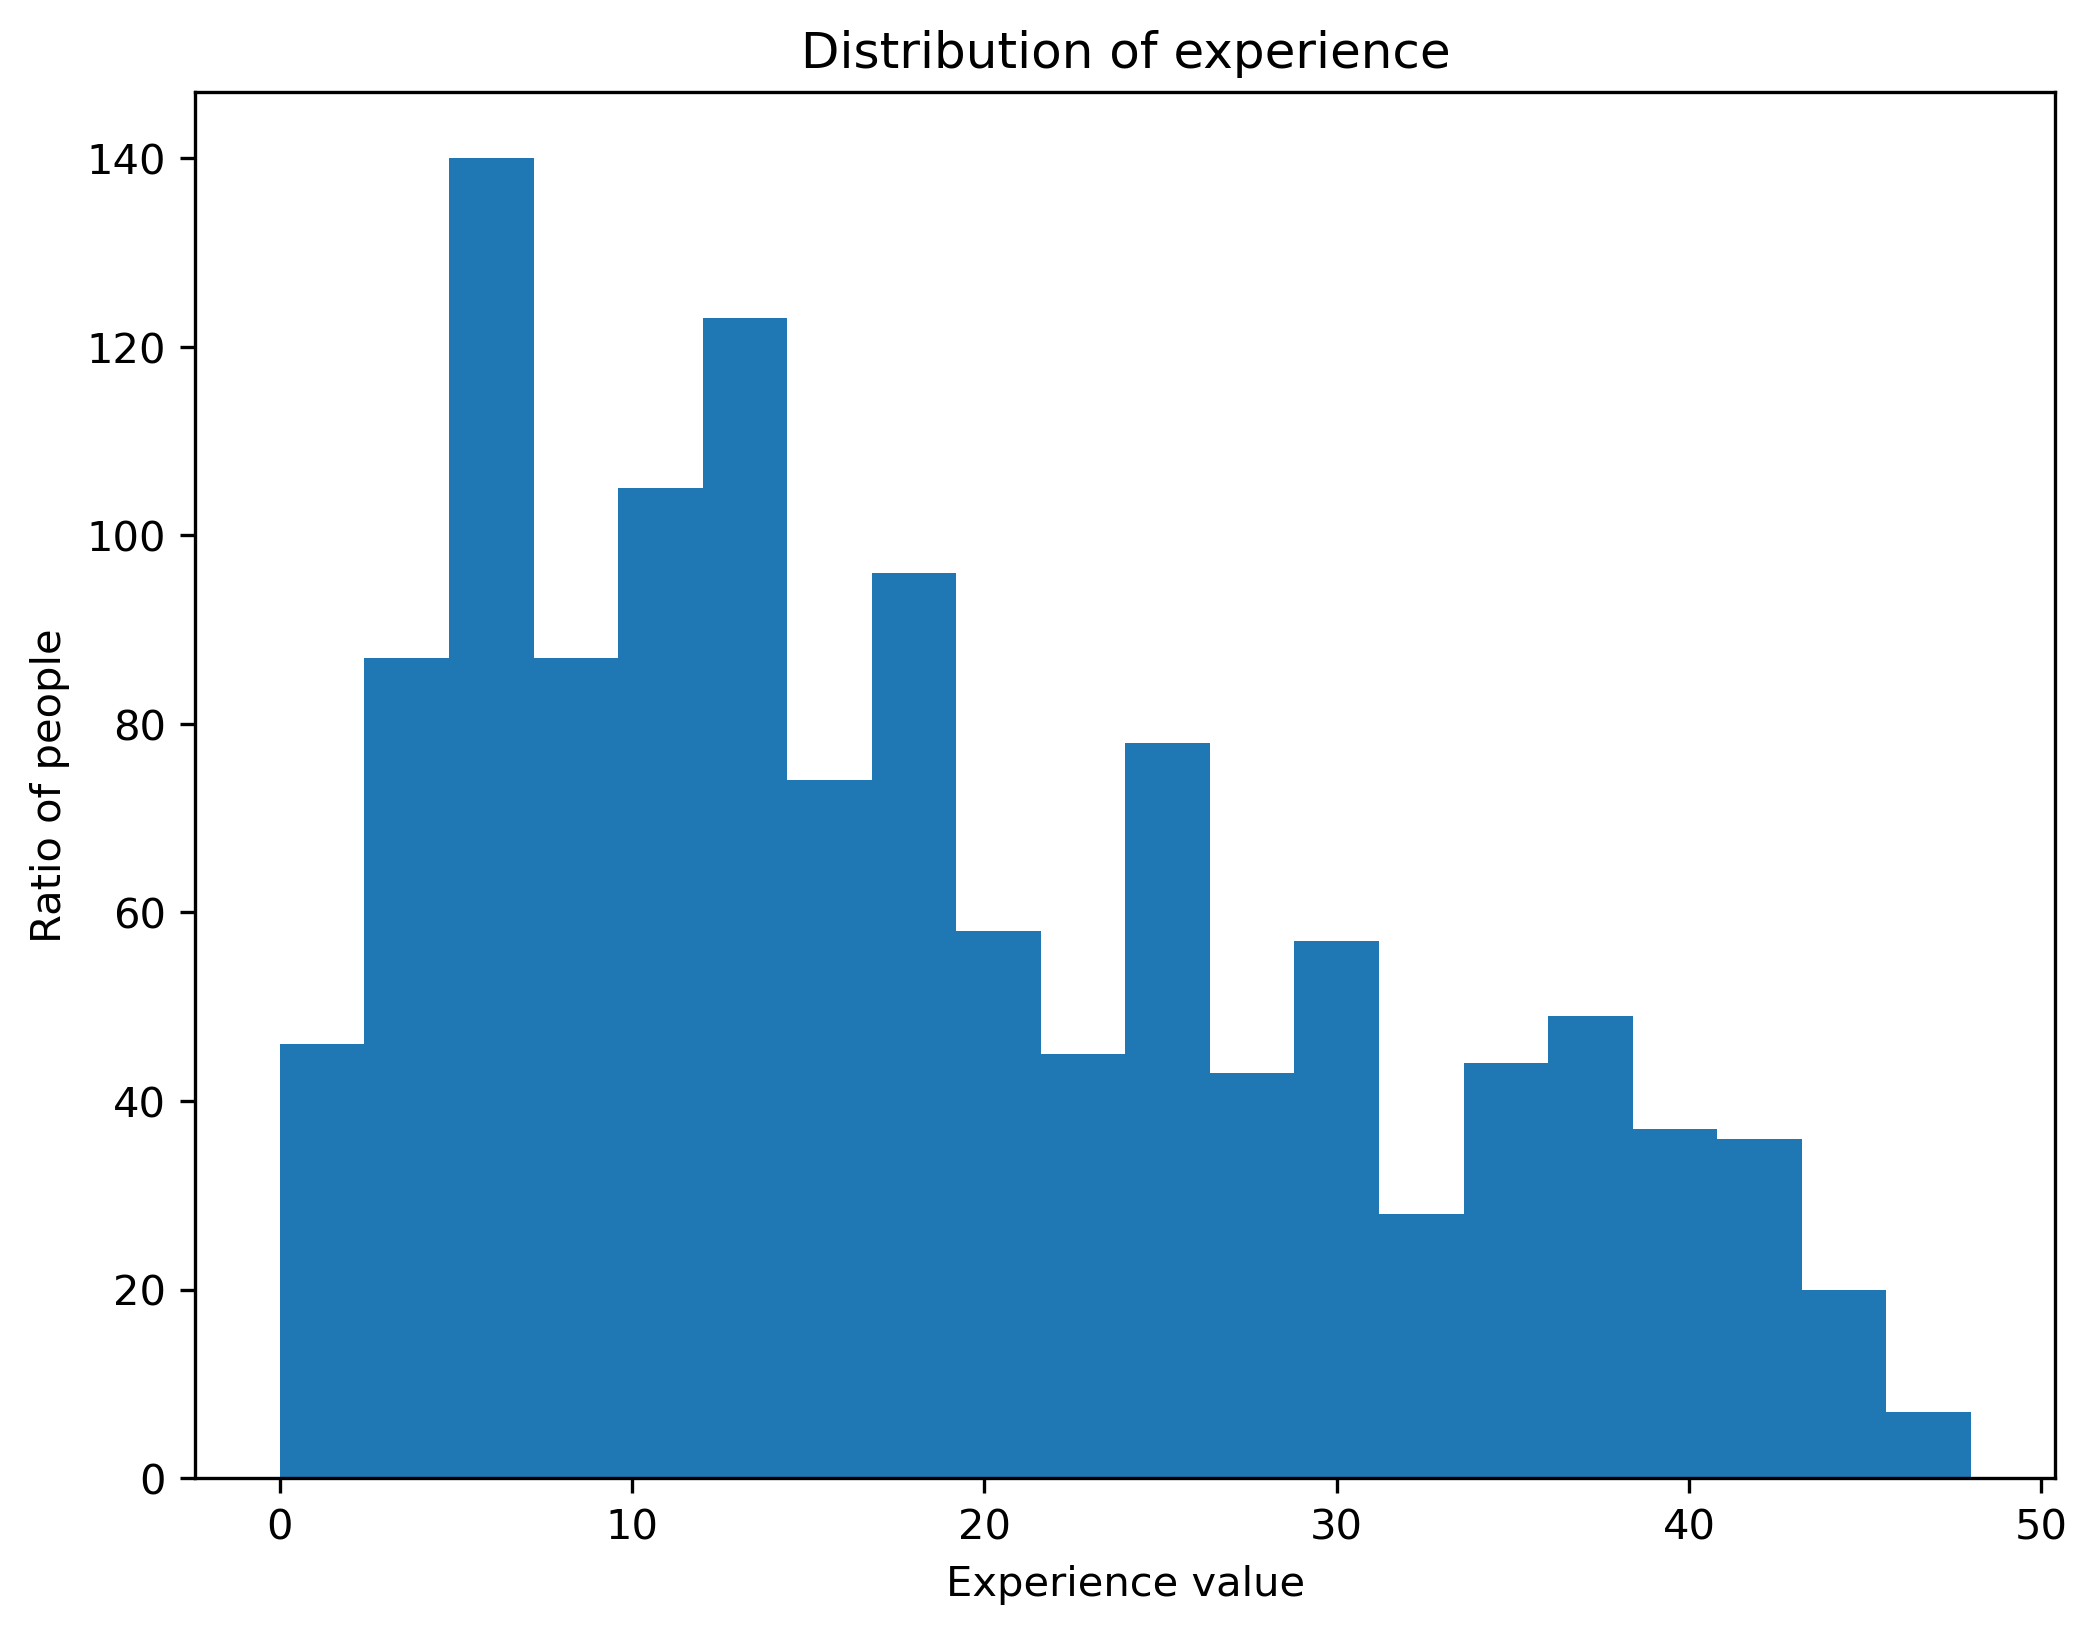

In [24]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.set_title('Distribution of experience')
ax.set_xlabel('Experience value')
ax.set_ylabel('Ratio of people')
plt.hist(df['exper'], bins=20)
plt.show()

Построим <code>sns<font color=steelblue>.violinplot</font></code> для распределения **exper** для разных значений **looks**

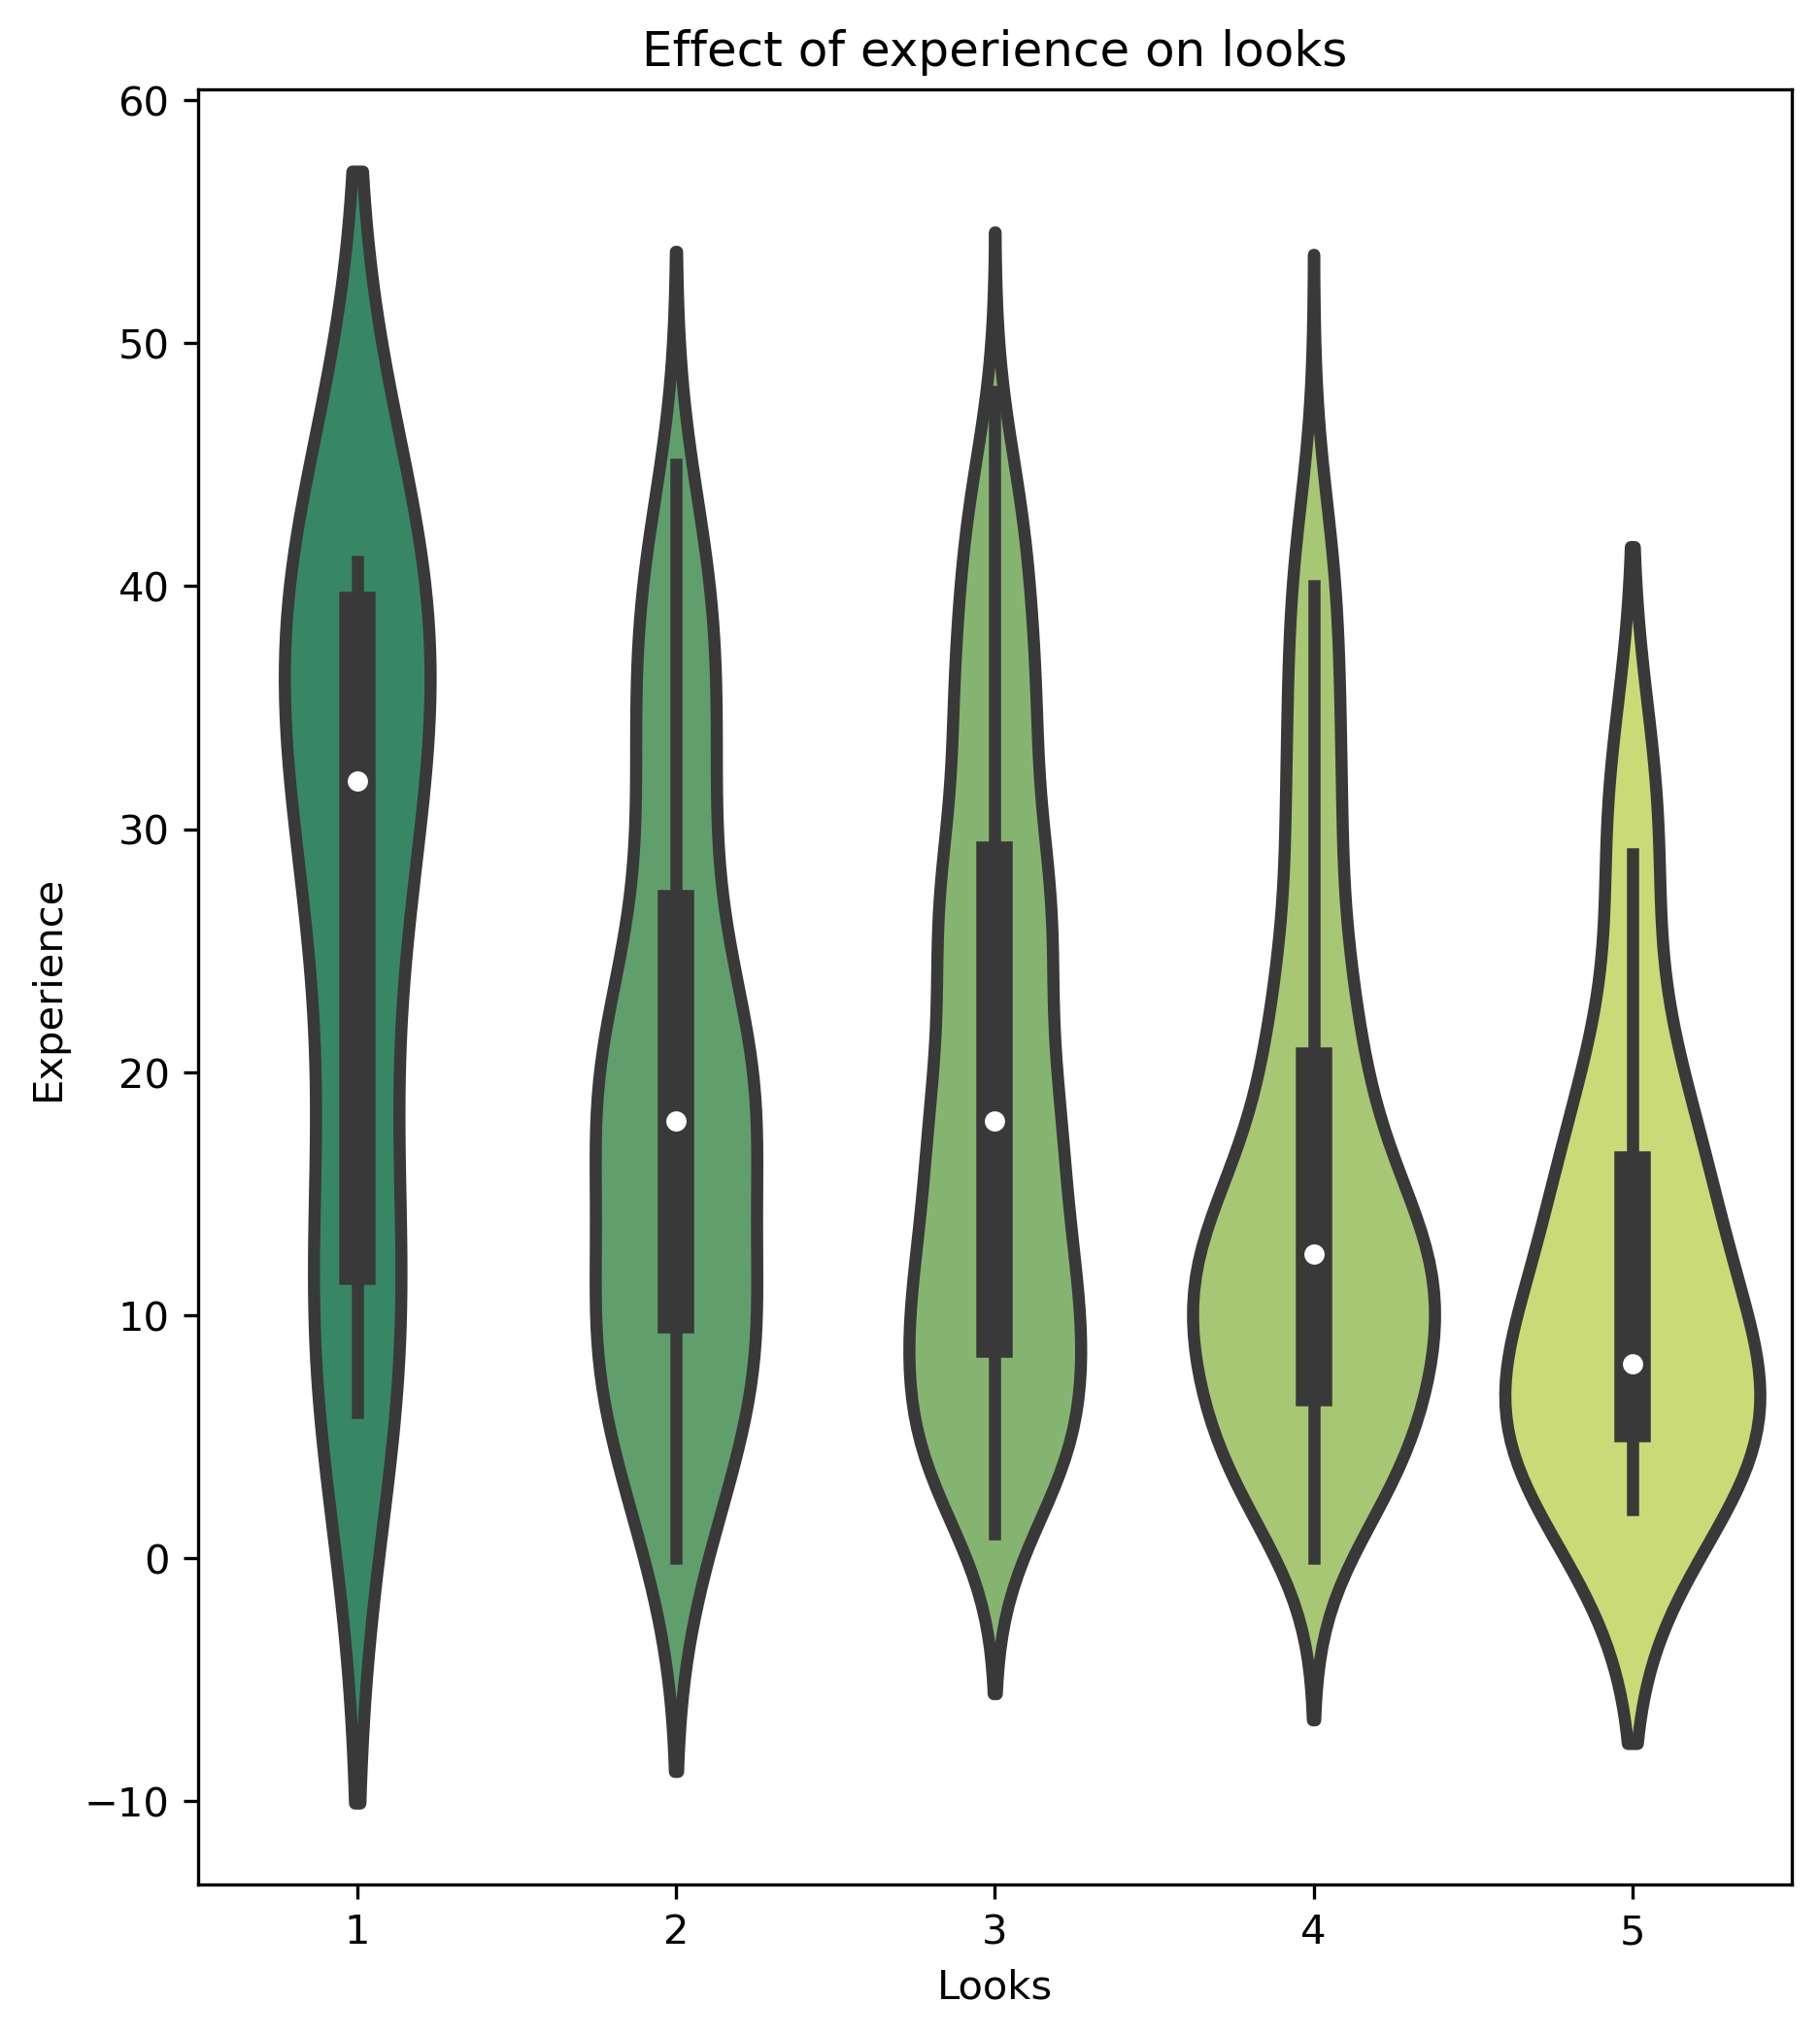

In [25]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
ax = sns.violinplot(data=df, x='looks', y='exper', palette='summer', linewidth=3)
ax.set_title('Effect of experience on looks')
ax.set_ylabel('Experience')
ax.set_xlabel('Looks')
plt.show()

Как можно заметить, в среднем лучшую оценку внешности получают молодые люди (с меньшим опытом работы, то есть с меньшим значением **exper**).

Теперь посмотрим на распределение **wage** (почасовая заработная плата)

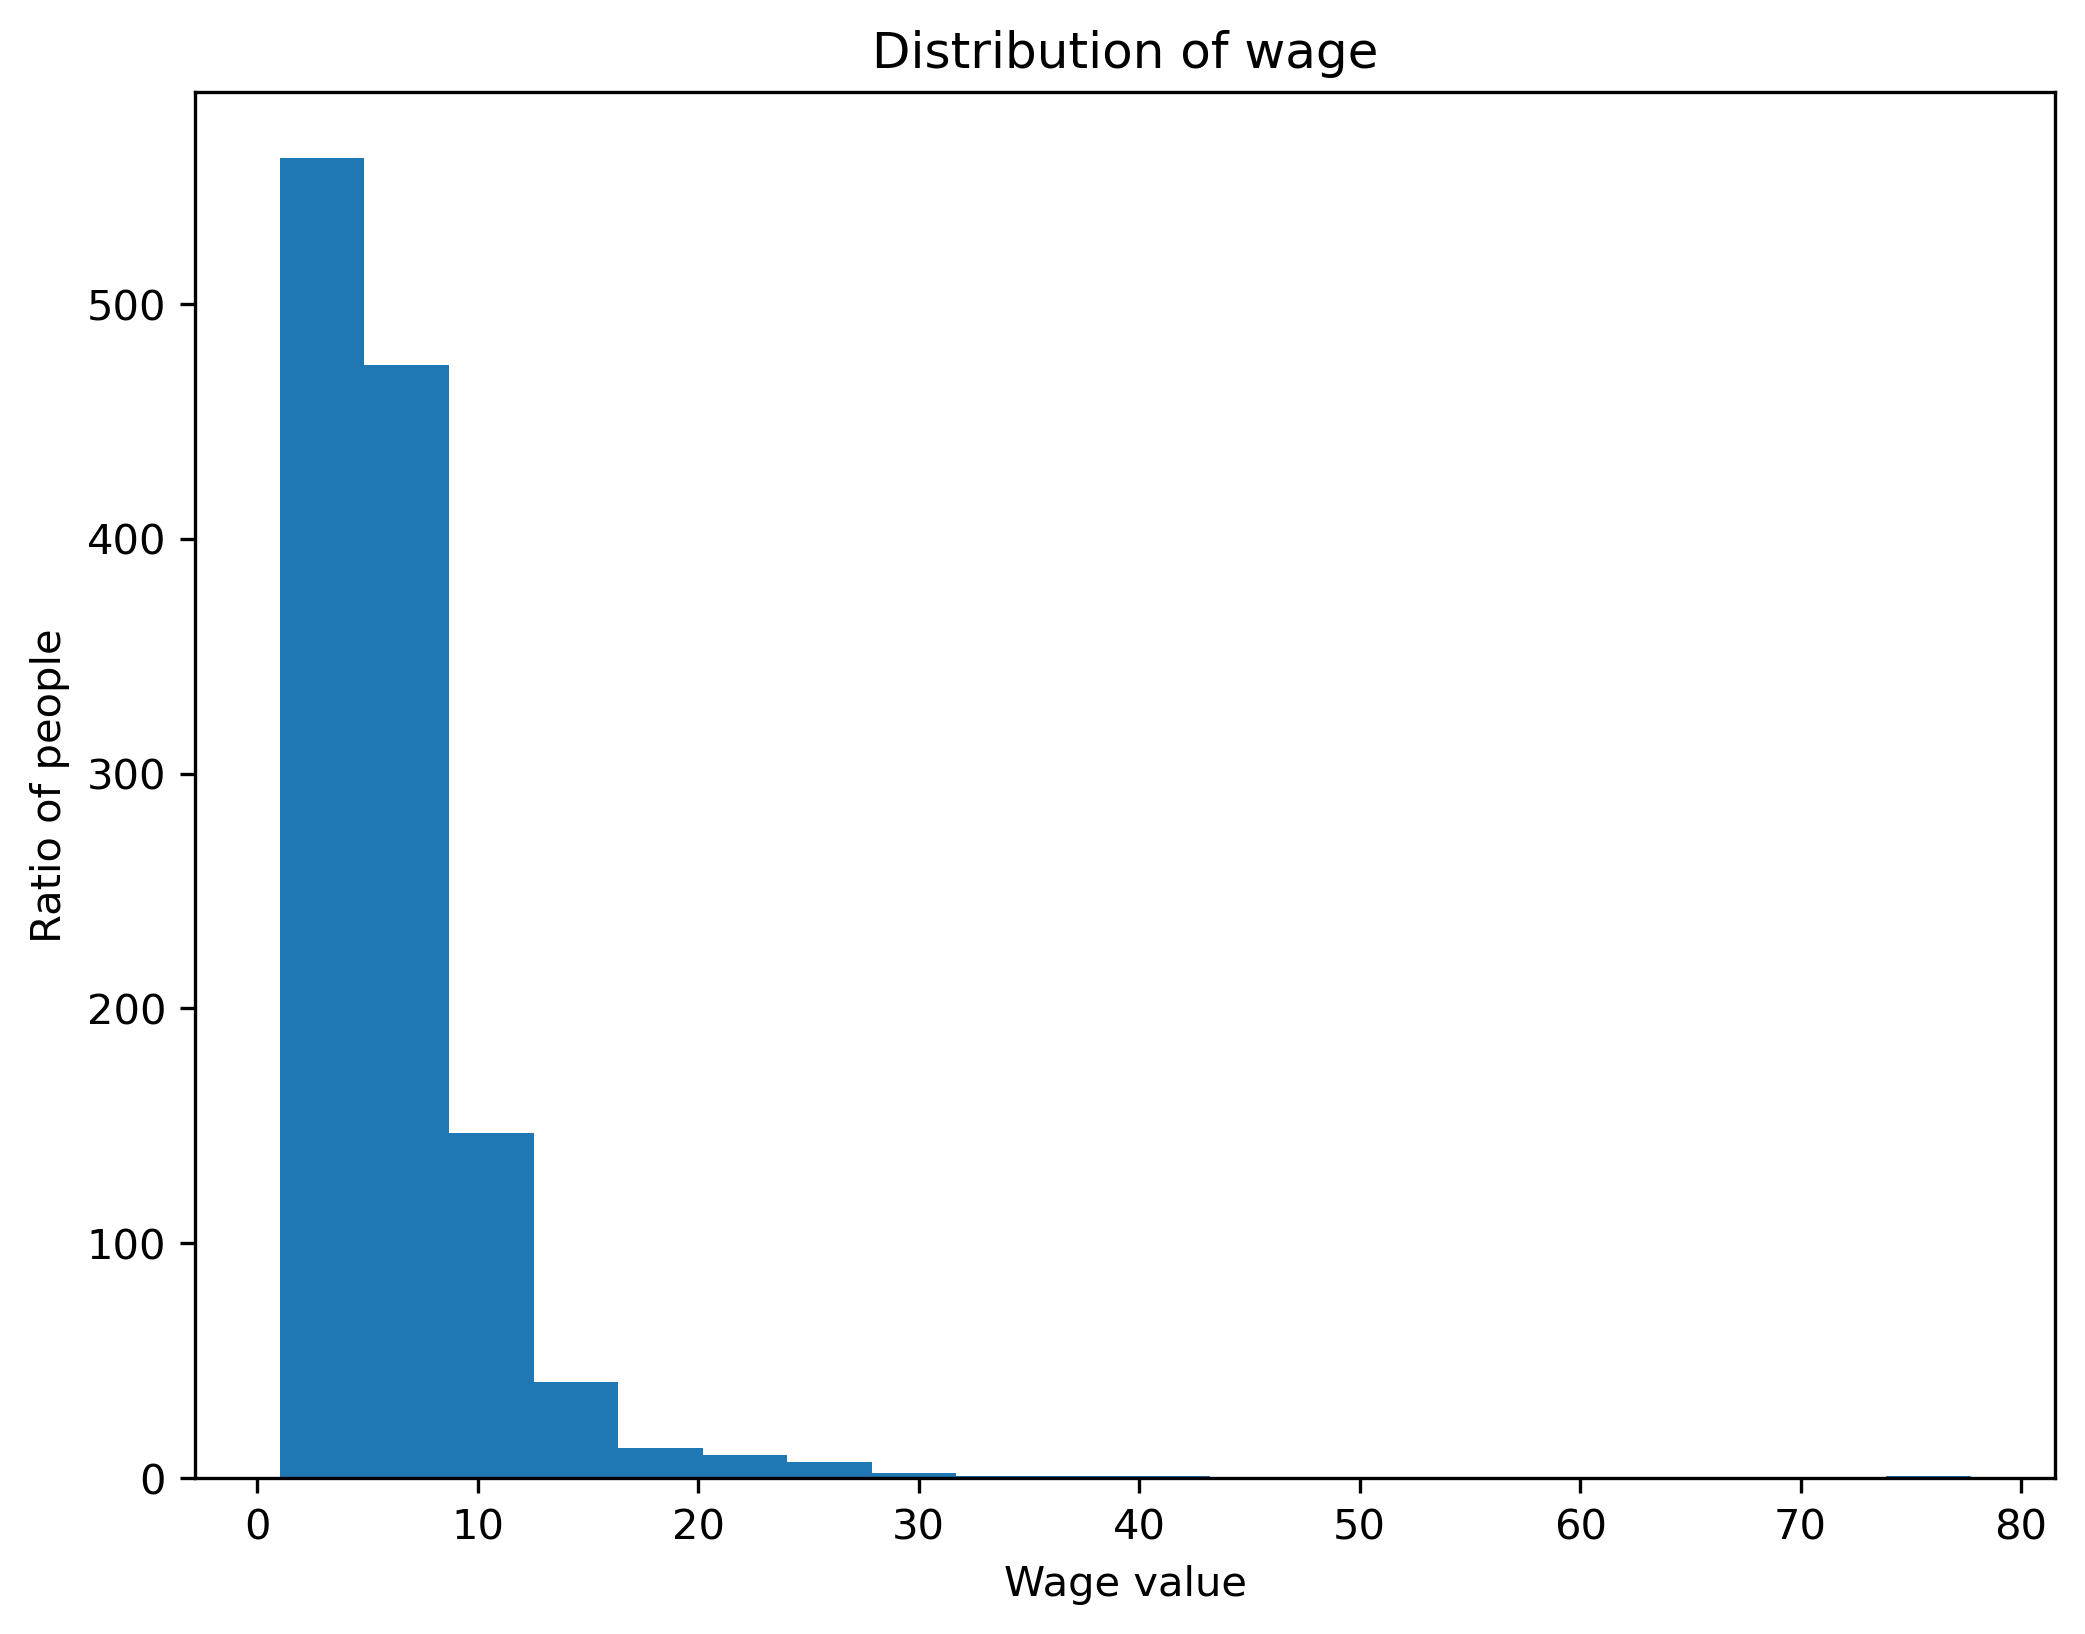

In [26]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.set_title('Distribution of wage')
ax.set_xlabel('Wage value')
ax.set_ylabel('Ratio of people')
plt.hist(df['wage'], bins=20)
plt.show()

Видно, что данное распределение сильно ассиметрично (большое значение **skewness**). Можно посторить <code>sns.<font color=steelblue>boxplot</font></code> для более наглядного представления

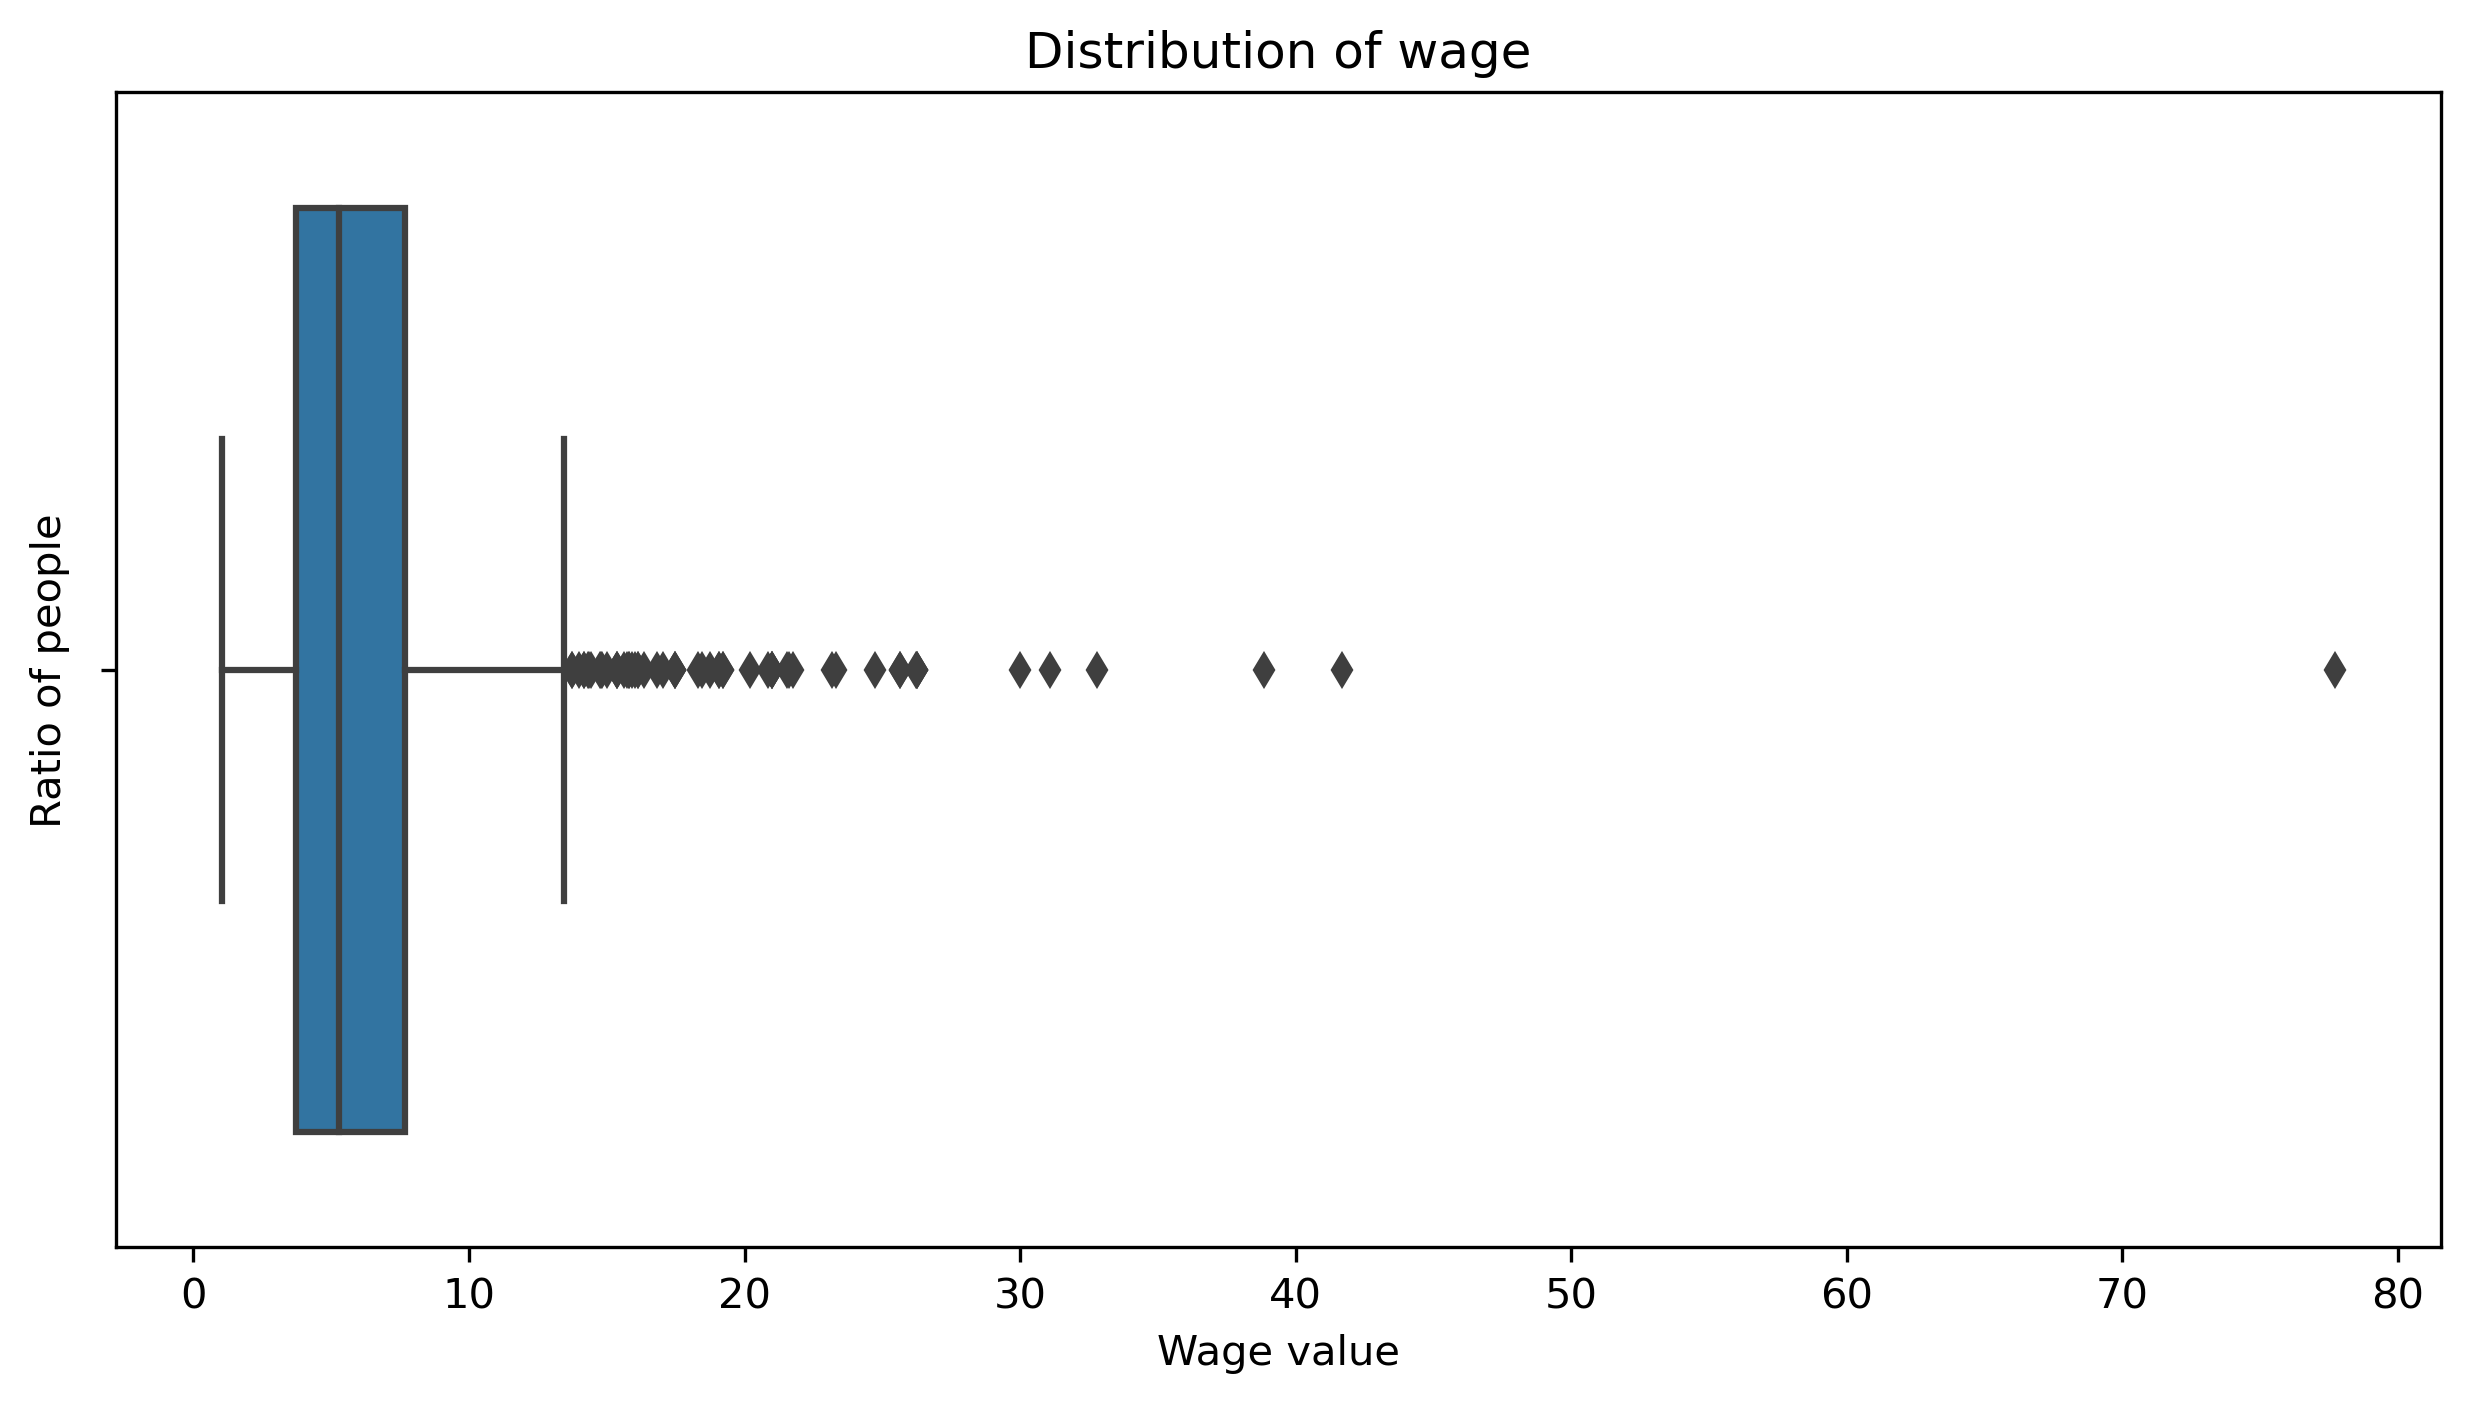

In [27]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
sns.boxplot(x=df['wage'], ax=ax)
ax.set_title('Distribution of wage')
ax.set_xlabel('Wage value')
ax.set_ylabel('Ratio of people')
plt.show()

В распределении есть очень много точек, выходящих за квантили 25% и 75%.

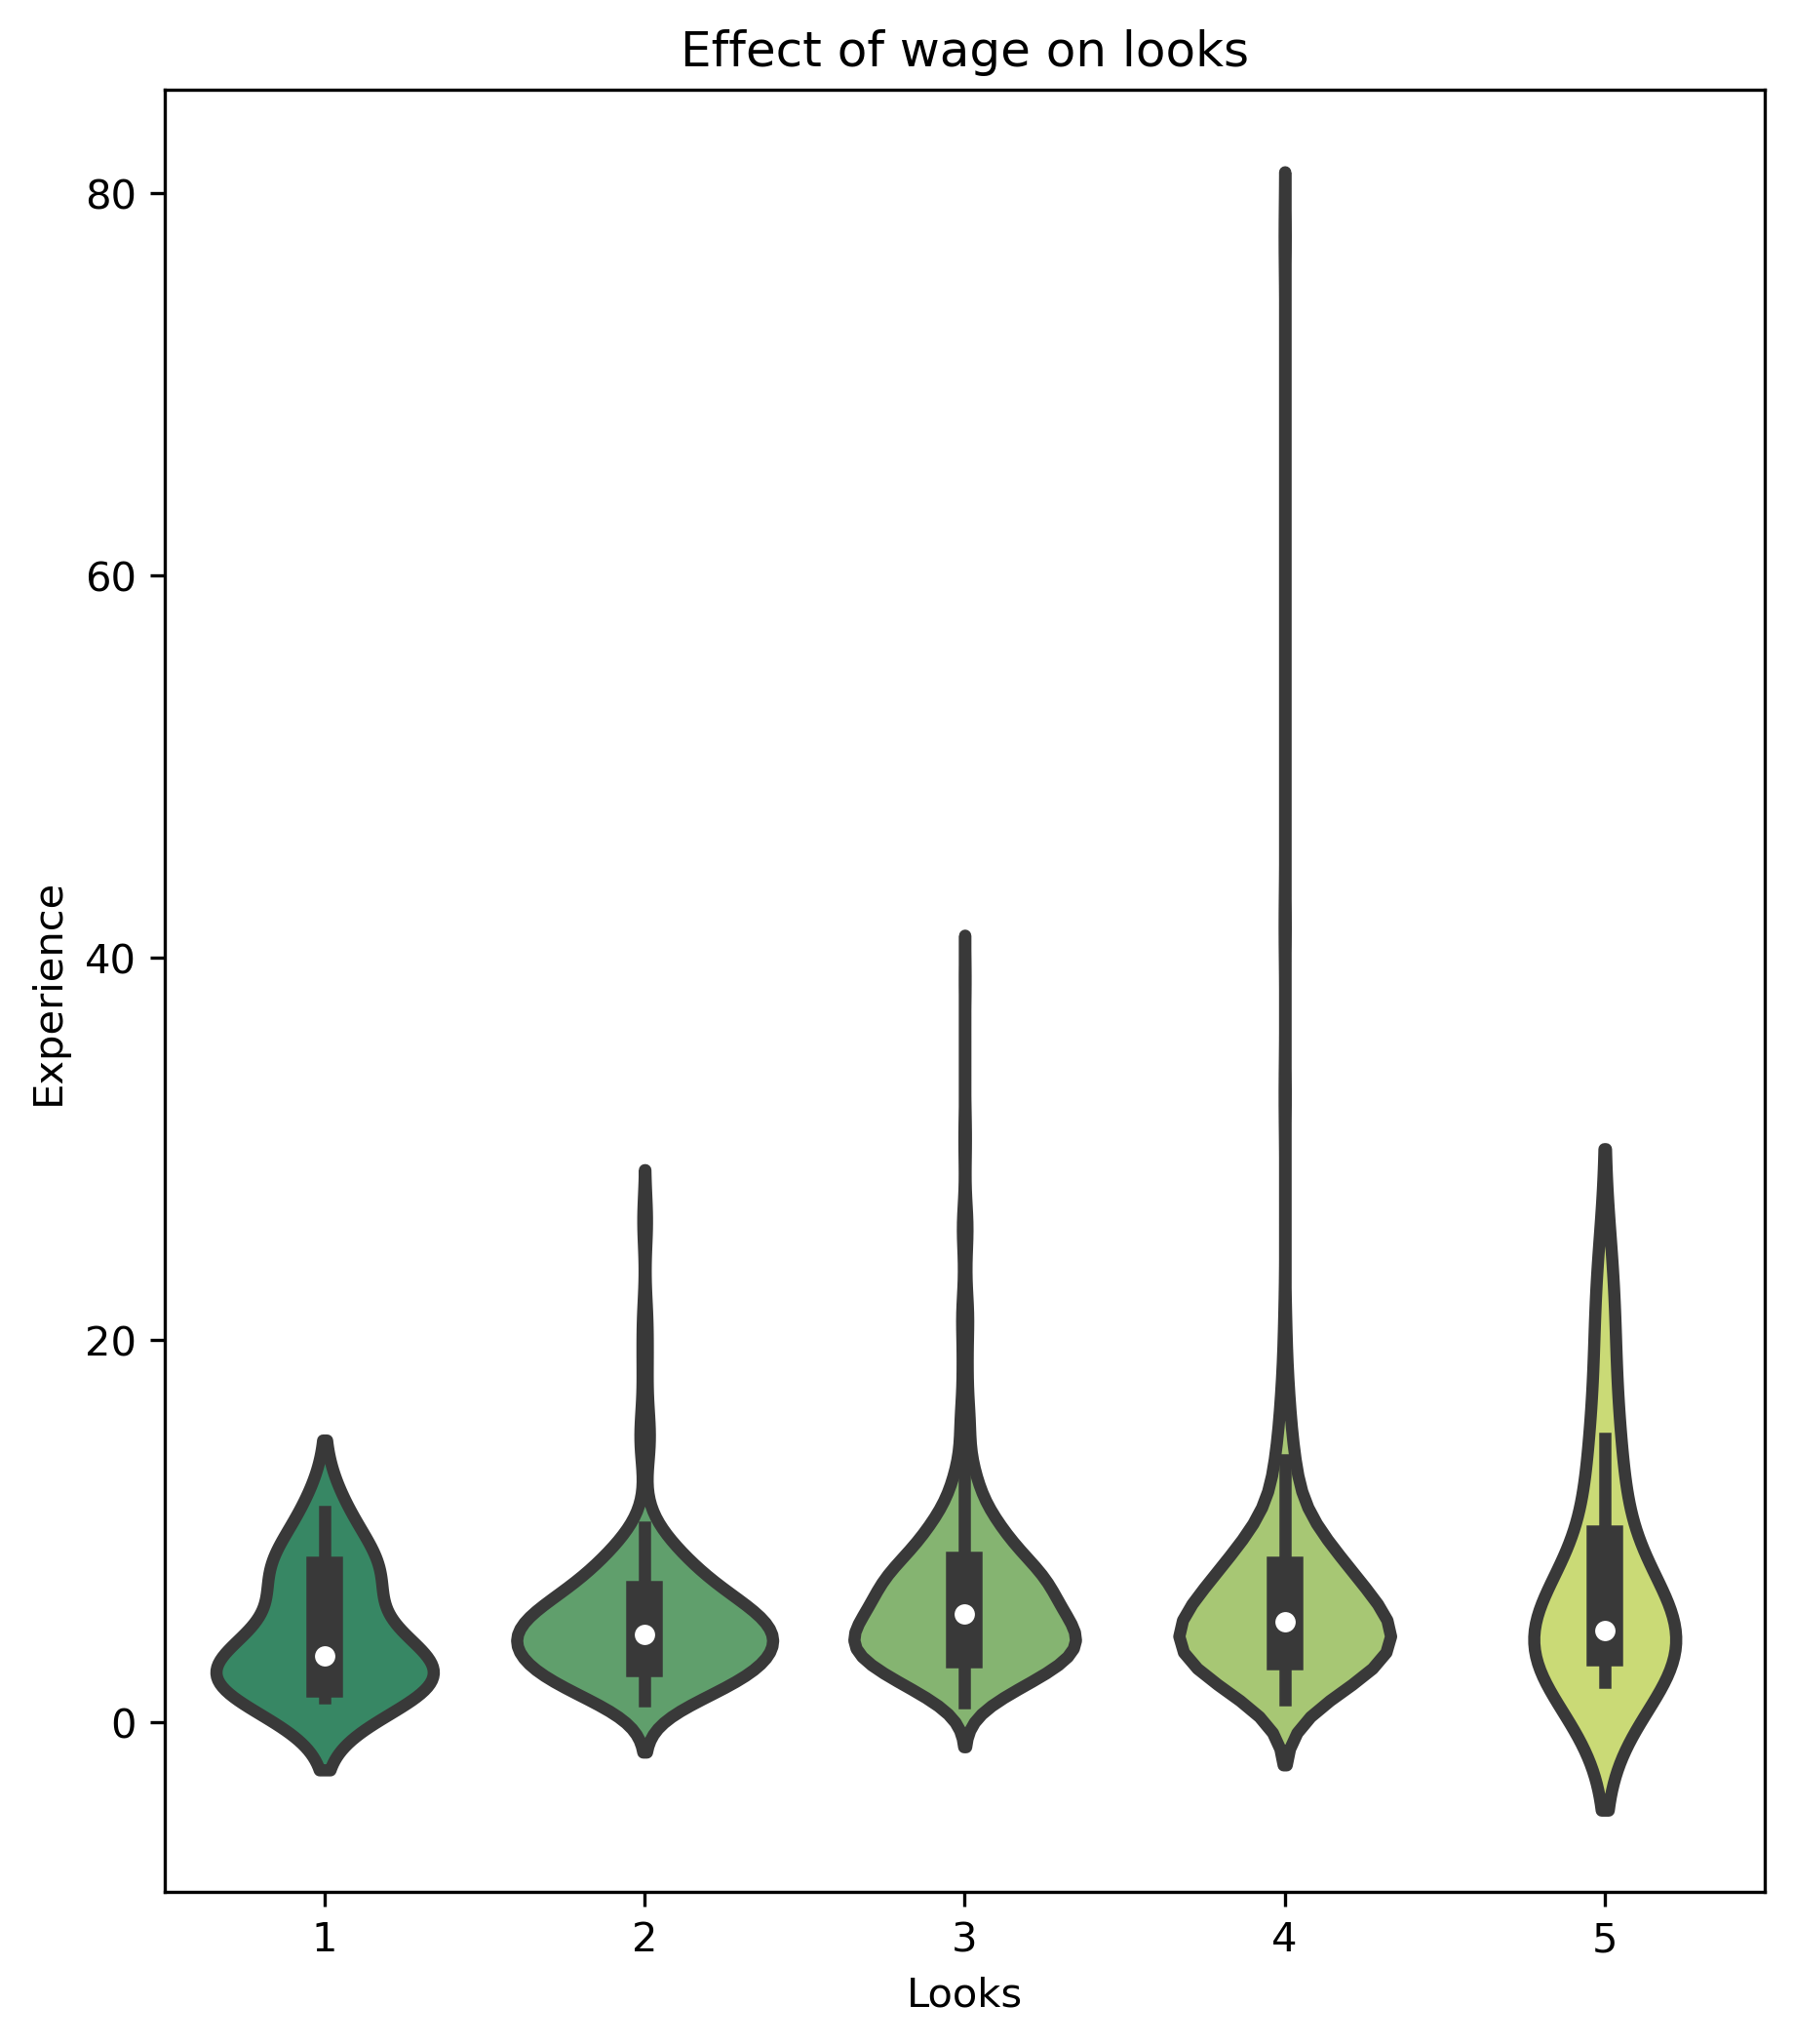

In [28]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
ax = sns.violinplot(data=df, x='looks', y='wage', palette='summer', linewidth=3)
ax.set_title('Effect of wage on looks')
ax.set_ylabel('Experience')
ax.set_xlabel('Looks')
plt.show()

Интересно, что в пределах **looks** от 1 до 4 есть явное смещение в область высоких заработных плат. Для оценки 4, похоже, имеется выброс в данных, который сильно смещает распределение по **wage**.

Найдем людей с самыми высокими заработными платами

In [29]:
df.sort_values(by=['wage'], ascending=False)

,wage,exper,union,service,educ,looks,sex,race,status,health,looks_str
602,77.72,9,no,no,13,4,female,black,married,good,4
269,41.67,16,no,no,13,4,male,white,married,bad,4
415,38.86,29,no,no,13,3,male,white,married,good,3
69,32.79,33,no,no,16,4,male,white,married,good,4
290,31.09,32,no,no,13,3,male,white,married,bad,3
...,...,...,...,...,...,...,...,...,...,...,...
597,1.16,5,no,no,10,3,female,white,married,good,3
462,1.16,2,no,no,13,4,female,white,single,good,4
1226,1.09,8,no,no,10,2,female,white,married,good,2
1009,1.05,29,no,no,5,3,male,black,married,good,3


Точка со значением <code>wage = 77.72</code> явно видна на <code>sns.<font color=steelblue>boxplot</font></code>. Удалим ее из датасета

In [30]:
df_dropped = df.drop([602])

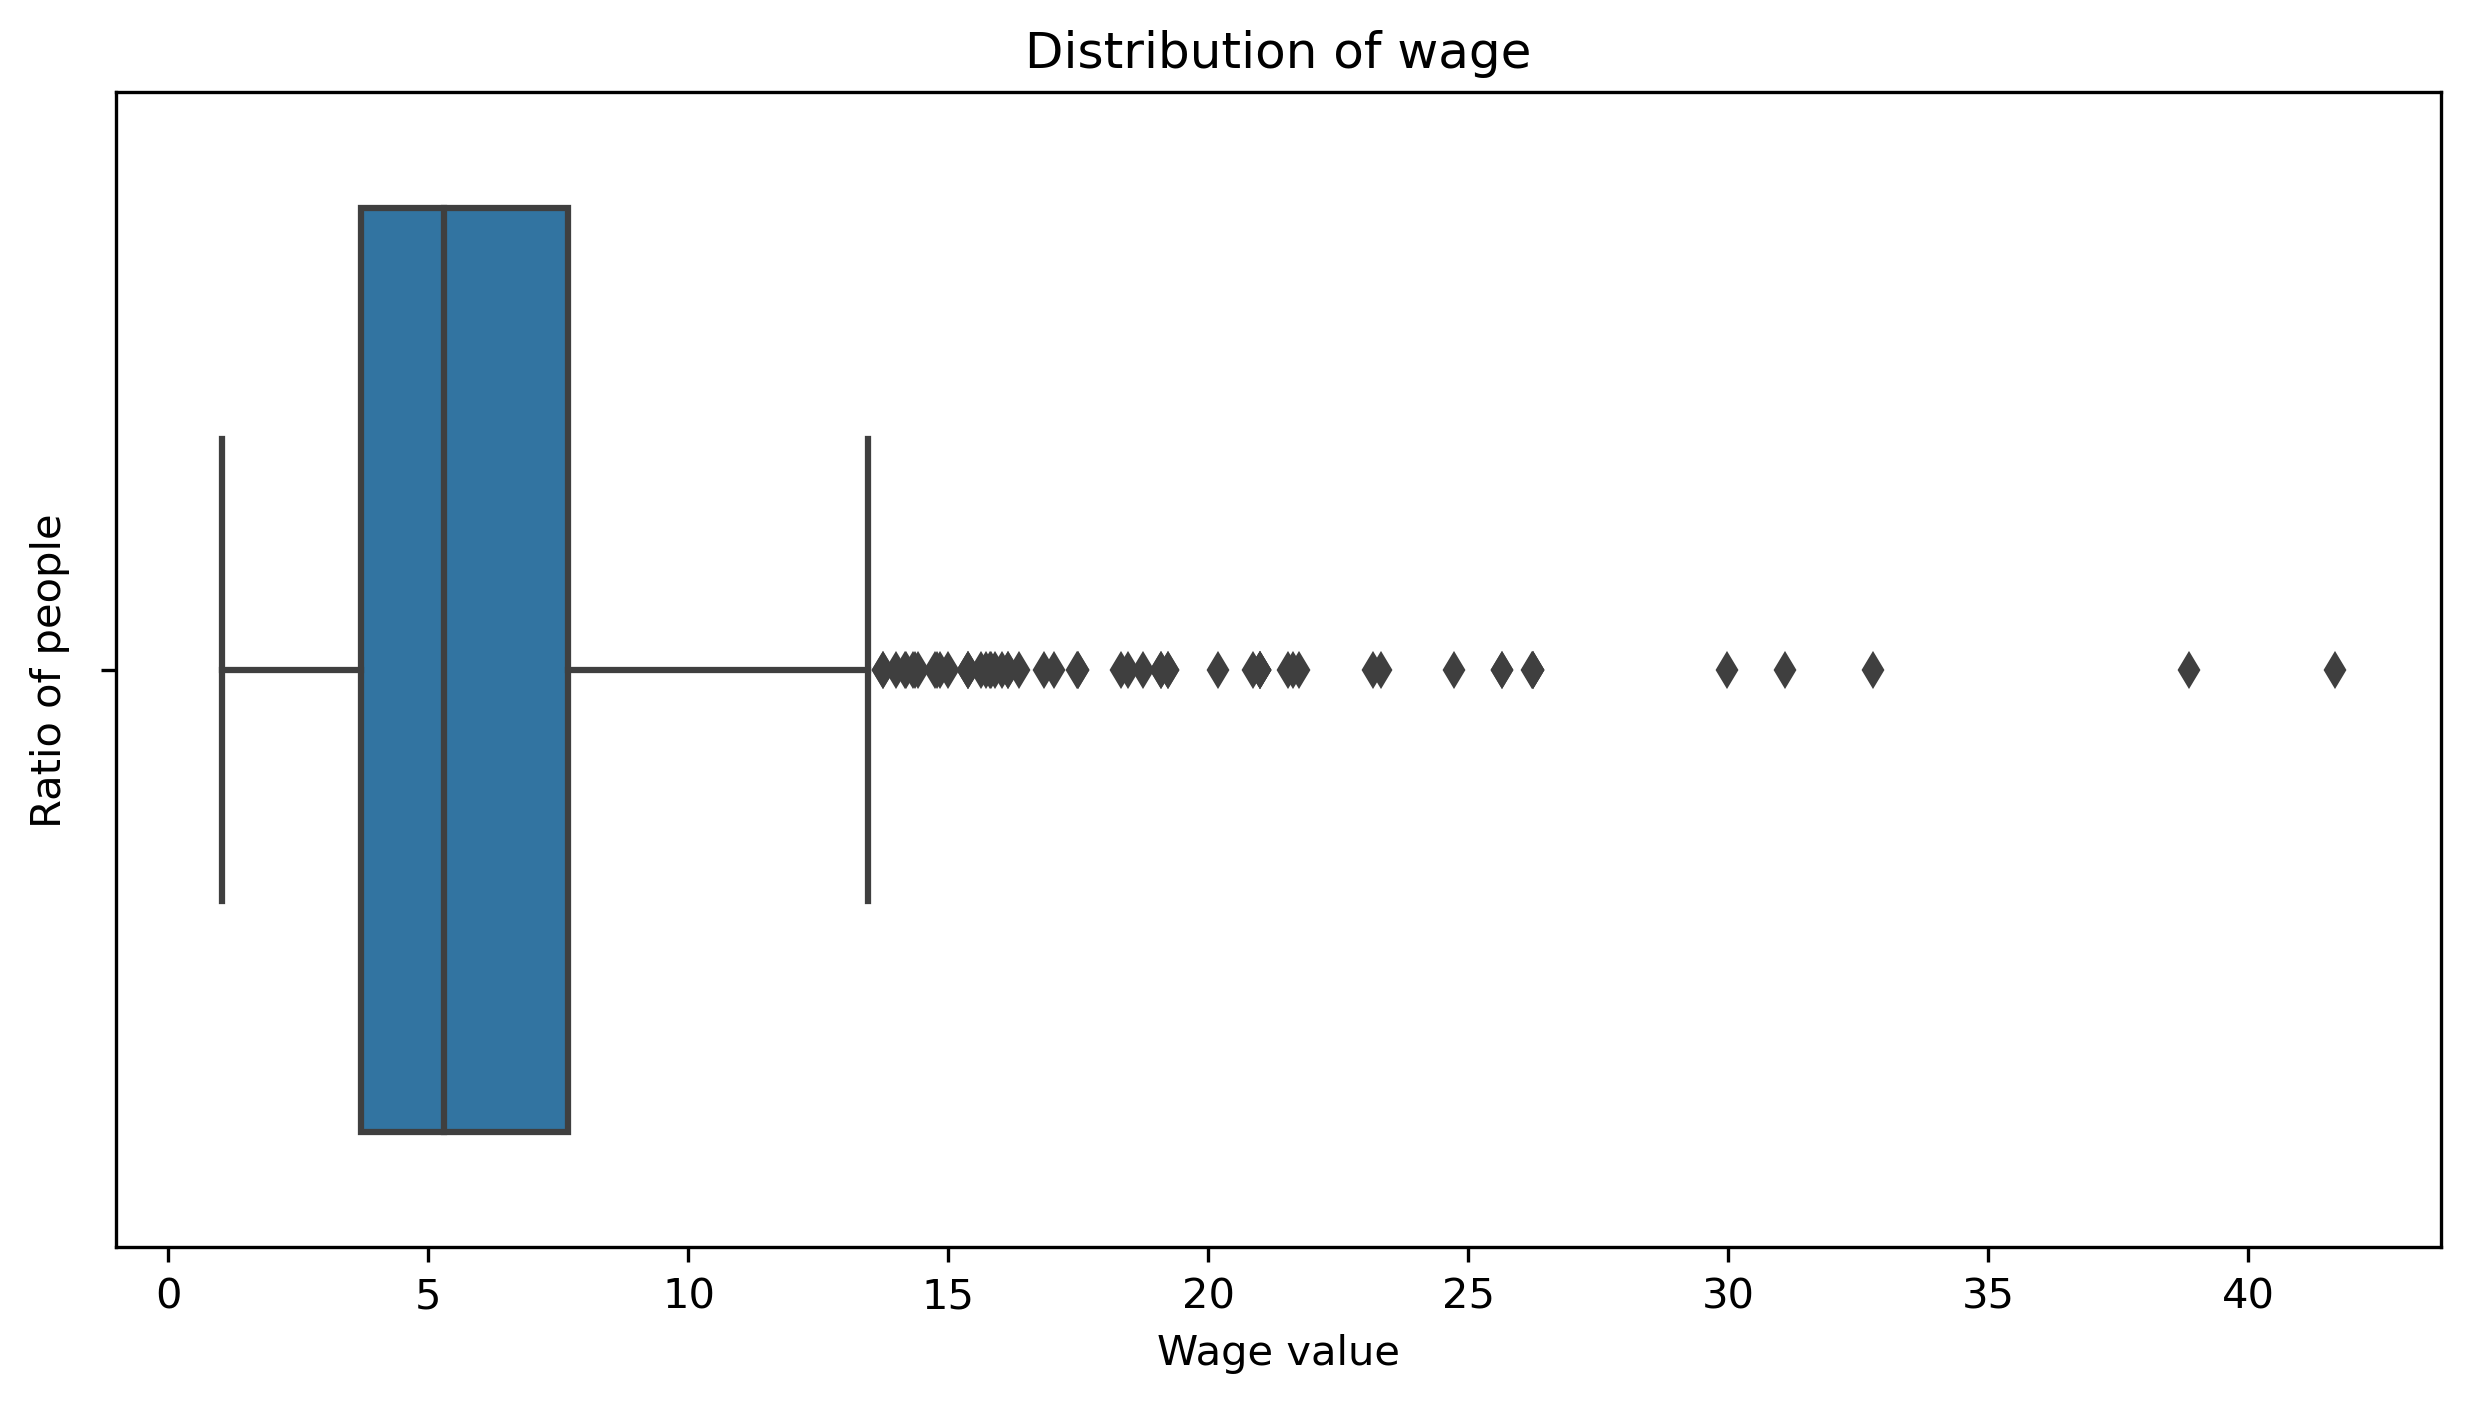

In [31]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
sns.boxplot(x=df_dropped['wage'], ax=ax)
ax.set_title('Distribution of wage')
ax.set_xlabel('Wage value')
ax.set_ylabel('Ratio of people')
plt.show()

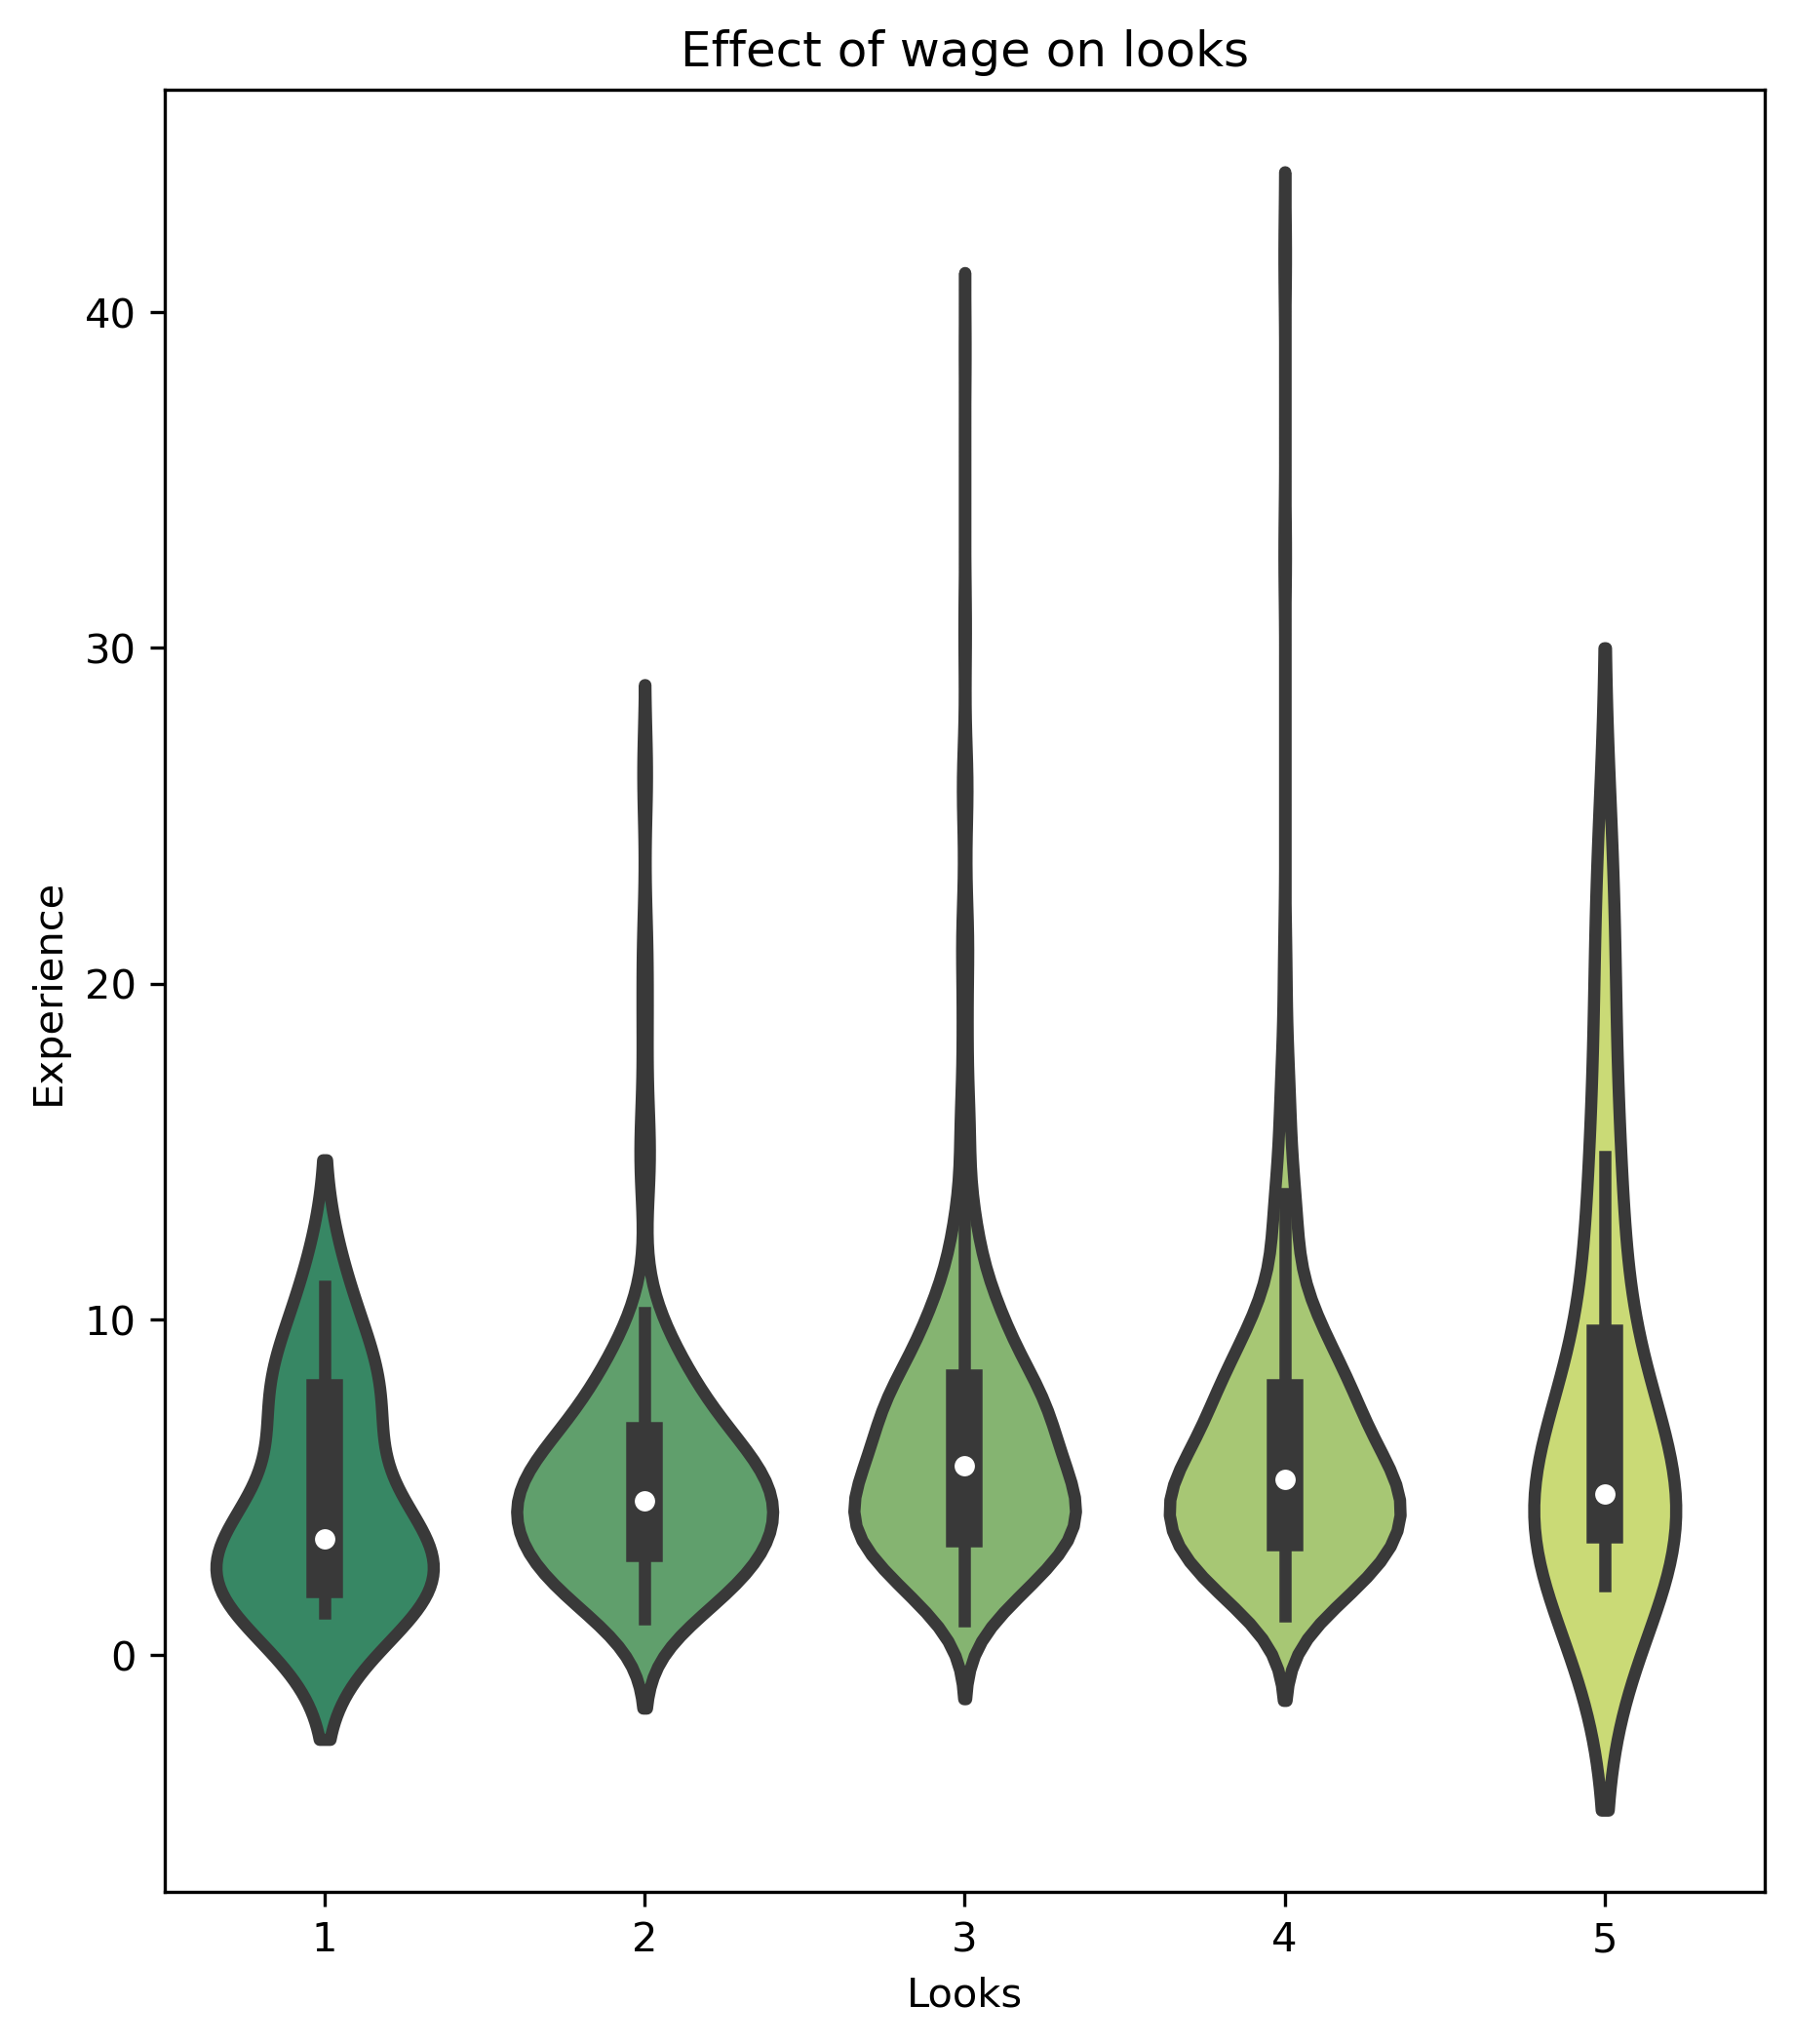

In [32]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
ax = sns.violinplot(data=df_dropped, x='looks', y='wage', palette='summer', linewidth=3)
ax.set_title('Effect of wage on looks')
ax.set_ylabel('Experience')
ax.set_xlabel('Looks')
plt.show()

Упомянутое смещение в область больших **wage** наблюдается при увеличении **looks**, однако средние значения колеблются в одной окрестности.

Осталось рассмотреть годы обучения в школе (**educ**)

In [33]:
df['educ'].value_counts()

educ
12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: count, dtype: int64

Как видим, большинство людей закончили 12-13 классов в школе. Посмотрим на распределение, используя гистограмму <code>plt.<font color=steelblue>hist</font></code>

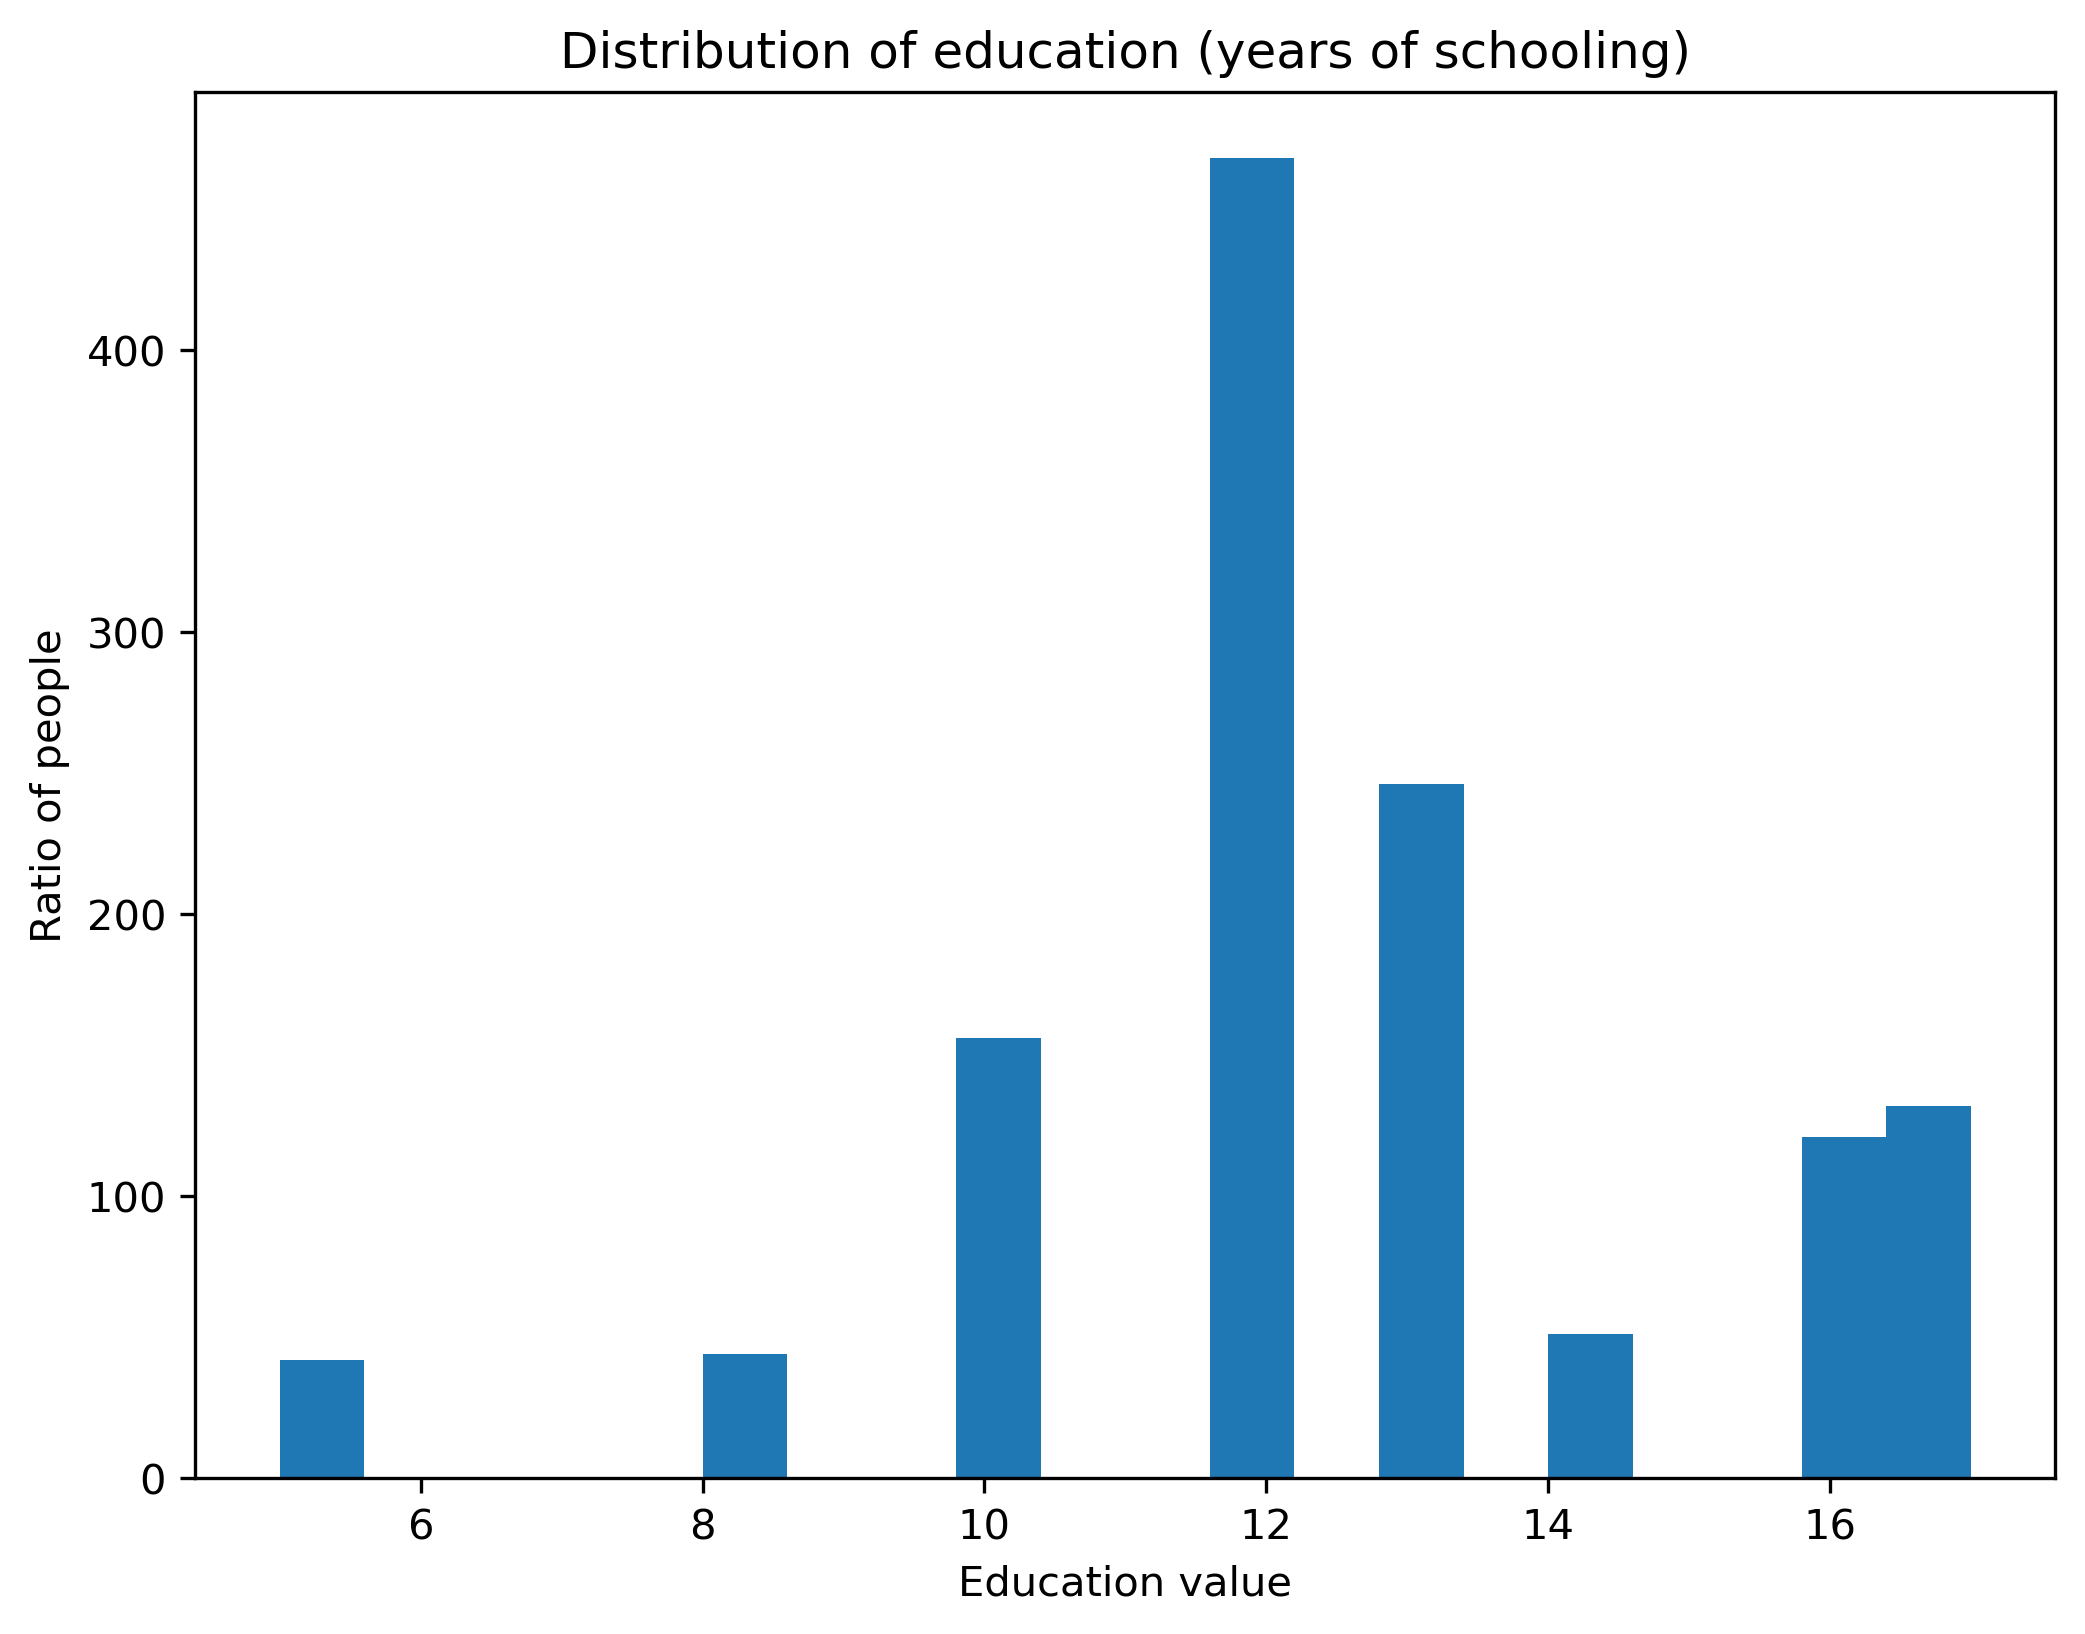

In [34]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.set_title('Distribution of education (years of schooling)')
ax.set_xlabel('Education value')
ax.set_ylabel('Ratio of people')
plt.hist(df['educ'], bins=20)
plt.show()

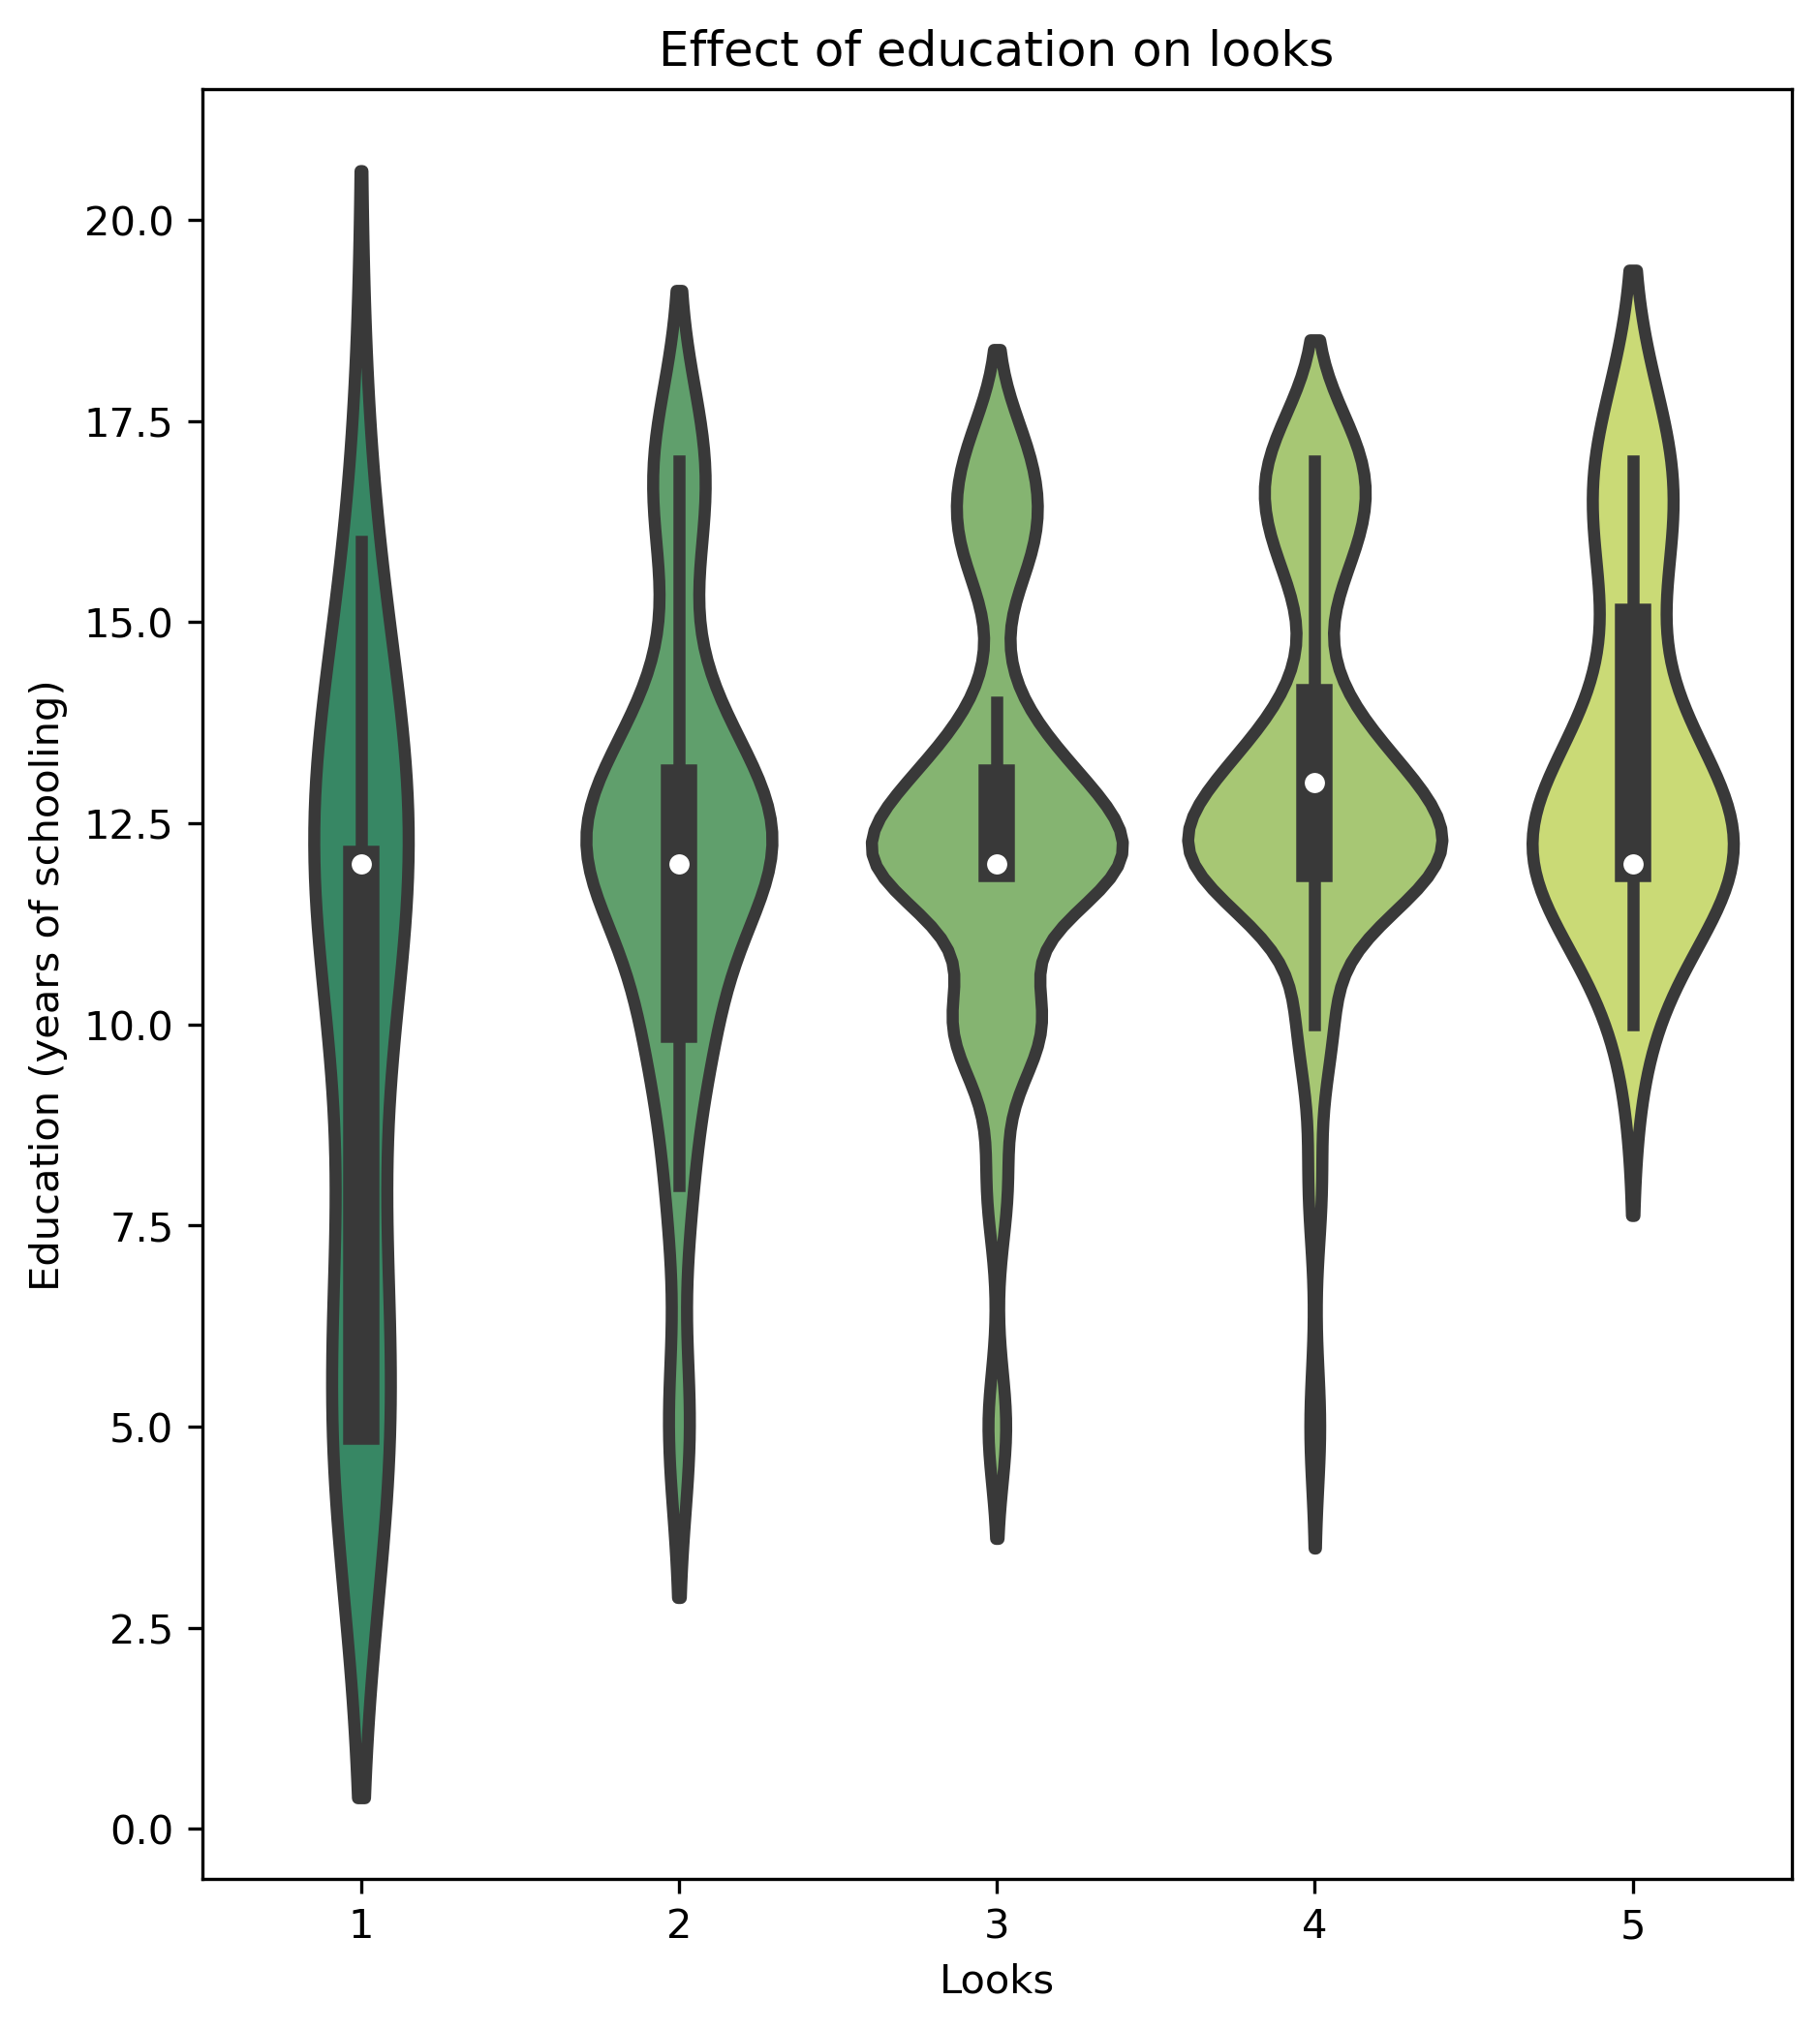

In [35]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
ax = sns.violinplot(data=df, x='looks', y='educ', palette='summer', linewidth=3)
ax.set_title('Effect of education on looks')
ax.set_ylabel('Education (years of schooling)')
ax.set_xlabel('Looks')
plt.show()

Видим, что с уменьшением оценки внешности есть смещение в область меньшего значения **educ**.

**Результаты однофакторного анализа**

На оценку внешности **looks** сильнее всего влияют здоровье **health**, статус человека **status**, опыт работы **exper**. Оставшиеся признаки (**sex**, **race**, **wage** и **educ**) влияют на оценку внешности в меньшей степени.

## Машинное обучение

Теперь приступим к задаче машинного обучения. Используем ряд алгоритмов из библиотеки <code>sklearn</code> для решения задачи классификации

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Закодируем все категориальные признаки с помощью **OneHotEncoding**

In [37]:
df.columns

Index(['wage', 'exper', 'union', 'service', 'educ', 'looks', 'sex', 'race',
       'status', 'health', 'looks_str'],
      dtype='object')

Удалим колонки **union**, **service** и **looks_str** из датасета <code>df_dropped</code> (из которого мы удалили информацию о человеке с самой большой заработной платой).

In [38]:
df = df_dropped.drop(columns=['union', 'service', 'looks_str'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    1259 non-null   float64
 1   exper   1259 non-null   int64  
 2   educ    1259 non-null   int64  
 3   looks   1259 non-null   int64  
 4   sex     1259 non-null   object 
 5   race    1259 non-null   object 
 6   status  1259 non-null   object 
 7   health  1259 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 88.5+ KB


In [40]:
base = pd.get_dummies(df, columns=['sex','race', \
                                   'status', 'health'], dtype=int, drop_first=True)
base.sample()

,wage,exper,educ,looks,sex_male,race_white,status_single,health_good
1041,9.62,11,12,3,1,1,0,1


In [41]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wage           1259 non-null   float64
 1   exper          1259 non-null   int64  
 2   educ           1259 non-null   int64  
 3   looks          1259 non-null   int64  
 4   sex_male       1259 non-null   int64  
 5   race_white     1259 non-null   int64  
 6   status_single  1259 non-null   int64  
 7   health_good    1259 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 88.5 KB


Для удобства столбец **looks** сделаем последним. 

In [42]:
base_columns = list(base.columns)
index_looks = base_columns.index('looks')
base_columns.pop(index_looks)
base_columns.append('looks')

base = base[base_columns]

base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wage           1259 non-null   float64
 1   exper          1259 non-null   int64  
 2   educ           1259 non-null   int64  
 3   sex_male       1259 non-null   int64  
 4   race_white     1259 non-null   int64  
 5   status_single  1259 non-null   int64  
 6   health_good    1259 non-null   int64  
 7   looks          1259 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 88.5 KB


In [43]:
base.head()

,wage,exper,educ,sex_male,race_white,status_single,health_good,looks
0,5.73,30,14,0,1,0,1,4
1,4.28,28,12,0,1,0,1,3
2,7.96,35,10,0,1,1,1,4
3,11.57,38,16,1,1,0,1,3
4,11.42,27,16,1,1,0,1,3


Организуем матрицу признаков и столбец из целевой переменной

In [44]:
X = base[base.columns[:-1]]
y = base['looks']

In [45]:
X.shape

(1259, 7)

Разобьем данные на обучающую и тестовую выборки и применим каждый из алгоритмов

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score_results = dict()

**1. Логистическая регрессия**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results.update({'Logistic Regression' : accuracy_score(target_test, y_test)})

score on train: 0.5690168818272096, score on test: 0.5753968253968254


/home/demidroll-s/anaconda3/envs/base_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. Метод опорных векторов (SVM)**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(dual='auto')
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results.update({'SVM' : accuracy_score(target_test, y_test)})

score on train: 0.5710029791459782, score on test: 0.5793650793650794


**3. Решающее дерево**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results.update({'Decision Tree' : accuracy_score(target_test, y_test)})

score on train: 0.9930486593843099, score on test: 0.39285714285714285


Видим, что модель решающего дерева сильно переобучилась.

**4. Случайный лес** 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results.update({'Random Forest' : accuracy_score(target_test, y_test)})

score on train: 0.9910625620655412, score on test: 0.5436507936507936


Аналогичное переобучение наблюдается для модели случайного леса.

Проведем обучение, рассмотрев наиболее значимые признаки

In [52]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wage           1259 non-null   float64
 1   exper          1259 non-null   int64  
 2   educ           1259 non-null   int64  
 3   sex_male       1259 non-null   int64  
 4   race_white     1259 non-null   int64  
 5   status_single  1259 non-null   int64  
 6   health_good    1259 non-null   int64  
 7   looks          1259 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 88.5 KB


In [53]:
base_significant = base.drop(columns=['wage', 'educ', 'sex_male', 'race_white'])

In [54]:
base_significant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   exper          1259 non-null   int64
 1   status_single  1259 non-null   int64
 2   health_good    1259 non-null   int64
 3   looks          1259 non-null   int64
dtypes: int64(4)
memory usage: 49.2 KB


In [55]:
X = base_significant[base_significant.columns[:-2]]
y = base_significant['looks']

In [56]:
X.shape

(1259, 2)

In [57]:
accuracy_score_results_significant = dict()

**1. Логистическая регрессия**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results_significant.update({'Logistic Regression' : accuracy_score(target_test, y_test)})

score on train: 0.5701676963812886, score on test: 0.6031746031746031


**2. Метод опорных векторов (SVM)**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = LinearSVC(dual='auto')
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results_significant.update({'SVM' : accuracy_score(target_test, y_test)})

score on train: 0.5763459841129744, score on test: 0.5476190476190477


**3. Решающее дерево**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results_significant.update({'Decision Tree' : accuracy_score(target_test, y_test)})

score on train: 0.5948808473080318, score on test: 0.5238095238095238


**4. Случайный лес** 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

target_train = clf.predict(X_train)
target_test = clf.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train, y_train),
                                                       accuracy_score(target_test, y_test)))

accuracy_score_results_significant.update({'Random Forest' : accuracy_score(target_test, y_test)})

score on train: 0.5931156222418358, score on test: 0.5555555555555556


In [62]:
for key, value in accuracy_score_results.items():
    print(f'{key:>20} {value:>10.5f}')

 Logistic Regression    0.57540
                 SVM    0.57937
       Decision Tree    0.39286
       Random Forest    0.54365


In [63]:
for key, value in accuracy_score_results_significant.items():
    print(f'{key:>20} {value:>10.5f}')

 Logistic Regression    0.60317
                 SVM    0.54762
       Decision Tree    0.52381
       Random Forest    0.55556


С обработкой признаков удалось улучшить значения accuracy score на **SVM**, **Decision Tree** и **Random Forest** алгоритмах.

**Результаты решения задачи машинного обучения**

1. Лучше всего сработал алгоритм **Logistiс Regression** (логистическая регрессия) и **SVM** (метод опорных векторов). 
2. Алгортитмы **Decision Tree** (решающее дерево) и **Random Forest**  (случайный лес) переобучились сильнее всего. После обработки признаков удалось улучшить показатели для **Decision Tree** и **Random Forest**.

Для более корректного решения задачи классификации необходимо помимо однофакторного анализа производить подробный **отбор признаков**. Часть признаков могут давать больший вклад в величину целевой переменной по сравнению с другими, менее значимыми признакими. Также многие признаки могут иметь совокупный эффект влияния на величину target.

Также невысокие показатели accuracy score могли возникнуть из-за неравномерности в распределении некоторых признаков (например, **wage** и **health**).